# load datasets

## Import datasets from google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Flat files
drug_info = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/drug_info.csv')
drug_name = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/drug_name.txt', header=None, names=['drug_name'])

# Sensitivity main files
DrugSens = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/DrugSens.csv')
DrugSensPivotted = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/DrugSensPivotted.csv')
DrugSens_onlynull = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/DrugSens_onlynull.csv')
DrugSens_withnull = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/DrugSens_withnull.csv')
GeneExp = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/features/GeneExp.csv')

# Classification - pivot
DrugSens_Test_clas_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/clas/DrugSens-Test.csv')
DrugSens_Train_clas_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/clas/DrugSens-Train.csv')
DrugSens_Trainhyper_Subsampling_clas_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/clas/DrugSens-Trainhyper-Subsampling.csv')
DrugSens_Validhyper_Subsampling_clas_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/clas/DrugSens-Validhyper-Subsampling.csv')

# Regression - pivot
DrugSens_Test_regr_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/regr/DrugSens-Test.csv')
DrugSens_Train_regr_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/regr/DrugSens-Train.csv')
DrugSens_Trainhyper_Subsampling_regr_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/regr/DrugSens-Trainhyper-Subsampling.csv')
DrugSens_Validhyper_Subsampling_regr_pivot = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/pivot/regr/DrugSens-Validhyper-Subsampling.csv')

# Classification - stack
DrugSens_Test_clas_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/clas/DrugSens-Test.csv')
DrugSens_Train_clas_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/clas/DrugSens-Train.csv')
DrugSens_Trainhyper_Subsampling_clas_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/clas/DrugSens-Trainhyper-Subsampling.csv')
DrugSens_Validhyper_Subsampling_clas_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/clas/DrugSens-Validhyper-Subsampling.csv')

# Regression - stack
DrugSens_Test_regr_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/regr/DrugSens-Test.csv')
DrugSens_Train_regr_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/regr/DrugSens-Train.csv')
DrugSens_Trainhyper_Subsampling_regr_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/regr/DrugSens-Trainhyper-Subsampling.csv')
DrugSens_Validhyper_Subsampling_regr_stack = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/regr/DrugSens-Validhyper-Subsampling.csv')

In [ ]:
dataset_names = [ "drug_info", "drug_name", "DrugSens", "DrugSensPivotted", "DrugSens_onlynull", "DrugSens_withnull", "GeneExp", "DrugSens_Test_clas_pivot", "DrugSens_Train_clas_pivot", "DrugSens_Trainhyper_Subsampling_clas_pivot", "DrugSens_Validhyper_Subsampling_clas_pivot", "DrugSens_Test_regr_pivot", "DrugSens_Train_regr_pivot", "DrugSens_Trainhyper_Subsampling_regr_pivot", "DrugSens_Validhyper_Subsampling_regr_pivot", "DrugSens_Test_clas_stack", "DrugSens_Train_clas_stack", "DrugSens_Trainhyper_Subsampling_clas_stack", "DrugSens_Validhyper_Subsampling_clas_stack", "DrugSens_Test_regr_stack", "DrugSens_Train_regr_stack", "DrugSens_Trainhyper_Subsampling_regr_stack", "DrugSens_Validhyper_Subsampling_regr_stack" ]

# Cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1: Load expression & sensitivity data
gene_exp = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/features/GeneExp.csv')
drug_sens = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/regr/DrugSens-Train.csv')

# 2: Clean gene expression
# Drop columns with too many missing values (e.g., >30%)
gene_exp_clean = gene_exp.dropna(thresh=0.7 * gene_exp.shape[0], axis=1)

# Fill remaining missing values with column mean
gene_exp_clean = gene_exp_clean.fillna(gene_exp_clean.mean(numeric_only=True))

# 3: Standard scale gene features (except ID column)
gene_features = gene_exp_clean.drop(columns=['Unnamed: 0'])
scaler = StandardScaler()
gene_scaled = scaler.fit_transform(gene_features)
gene_scaled_df = pd.DataFrame(gene_scaled, columns=gene_features.columns)
gene_scaled_df.insert(0, 'cell_line', gene_exp_clean['Unnamed: 0'])

# 4: Prepare sensitivity data
# Remove rows with missing or invalid IC50
drug_sens = drug_sens[drug_sens['IC50'].notna() & (drug_sens['IC50'] > 0)]

# Add sensitivity label: 1 = high sensitivity, 0 = low sensitivity
drug_sens['sensitivity_label'] = (np.log(drug_sens['IC50']) <= 1.5).astype(int)

# 5: Merge gene expression with sensitivity data on cell line
merged = pd.merge(
    gene_scaled_df,
    drug_sens[['cell_line', 'gdsc_name', 'IC50', 'sensitivity_label', 'cancer_type']],
    on='cell_line',
    how='inner'
)

# 6: Final preview
print("Final dataset shape:", merged.shape)
print("Columns:", merged.columns.tolist())
print("Missing values:", merged.isnull().sum().sum())
print("Cancer types distribution:\n", merged['cancer_type'].value_counts())
print("Sensitivity label distribution:\n", merged['sensitivity_label'].value_counts())

<ipython-input-10-b59601633347>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_sens['sensitivity_label'] = (np.log(drug_sens['IC50']) <= 1.5).astype(int)


Final dataset shape: (92563, 740)
Columns: ['cell_line', 'A1CF', 'ABI1', 'ABL1', 'ABL2', 'ACKR3', 'ACSL3', 'ACSL6', 'ACVR1', 'ACVR1B', 'ACVR2A', 'AFDN', 'AFF1', 'AFF3', 'AFF4', 'AKAP9', 'AKT1', 'AKT2', 'AKT3', 'ALDH2', 'ALK', 'AMER1', 'ANK1', 'APC', 'APOBEC3B', 'AR', 'ARAF', 'ARHGAP26', 'ARHGAP35', 'ARHGAP5', 'ARHGEF10', 'ARHGEF10L', 'ARHGEF12', 'ARID1A', 'ARID1B', 'ARID2', 'ARNT', 'ASPM', 'ASPSCR1', 'ASXL1', 'ASXL2', 'ATF1', 'ATIC', 'ATM', 'ATP1A1', 'ATP2B3', 'ATR', 'ATRX', 'AXIN1', 'AXIN2', 'B2M', 'BAP1', 'BARD1', 'BAX', 'BAZ1A', 'BCL10', 'BCL11A', 'BCL11B', 'BCL2', 'BCL2L12', 'BCL3', 'BCL6', 'BCL7A', 'BCL9', 'BCL9L', 'BCLAF1', 'BCOR', 'BCORL1', 'BCR', 'BIRC3', 'BIRC6', 'BLM', 'BMP5', 'BMPR1A', 'BRAF', 'BRCA1', 'BRCA2', 'BRD3', 'BRD4', 'BRIP1', 'BTG1', 'BTG2', 'BTK', 'BUB1B', 'C15orf65', 'CACNA1D', 'CALR', 'CAMTA1', 'CANT1', 'CARD11', 'CASP3', 'CASP8', 'CASP9', 'CBFA2T3', 'CBFB', 'CBL', 'CBLB', 'CBLC', 'CCDC6', 'CCNB1IP1', 'CCNC', 'CCND1', 'CCND2', 'CCND3', 'CCNE1', 'CCR4', 'CCR7', '

In [ ]:
merged = pd.merge(drug_sens, drug_info[['DRUG_NAME', 'SMILES']], how='left', left_on='gdsc_name', right_on='DRUG_NAME')

In [ ]:
# Fix SMILES column
if 'SMILES_y' in merged.columns:
    merged = merged.rename(columns={'SMILES_y': 'SMILES'})

# Rename gene expression ID column if needed
gene_exp = gene_exp.rename(columns={'Unnamed: 0': 'cell_line'})

# Modality availability flags
merged['has_SMILES'] = merged['SMILES'].notna()
merged['has_IC50'] = merged['IC50'].notna()
merged['has_GeneExp'] = merged['cell_line'].isin(gene_exp['cell_line'].unique())

# Summary
modality_summary = merged[['has_SMILES', 'has_IC50', 'has_GeneExp']].mean() * 100
print("\nModality coverage (%):")
print(modality_summary)


Modality coverage (%):
has_SMILES     100.0
has_IC50       100.0
has_GeneExp    100.0
dtype: float64


# Encoding & Compare SMILES, fingerprints, and molecular graphs with simple baseline model

In [ ]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 33.1 MB/s eta 0:00:00


In [ ]:
print(drug_info.columns)

Index(['DRUG_ID', 'DRUG_NAME', 'SMILES'], dtype='object')


In [ ]:
# Use only required columns for merging
merged = pd.merge(
    drug_sens,
    drug_info[['DRUG_NAME', 'SMILES']],
    how='inner',
    left_on='gdsc_name',
    right_on='DRUG_NAME'
)

In [ ]:
# Rename correct SMILES column
merged = merged.rename(columns={'SMILES_y': 'SMILES'})

# to select and visualize just the first molecule from this dataset(first row) for inspection
example_smiles = merged['SMILES'].iloc[0]

## Fingerprint -> MLP

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split

# Load data
drug_info = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/drug_info.csv')
drug_sens = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/datasets/sensitivity/stack/regr/DrugSens-Train.csv')

# Filter and label
drug_sens = drug_sens[drug_sens['IC50'].notna() & (drug_sens['IC50'] > 0)]
drug_sens['sensitivity_label'] = (np.log(drug_sens['IC50']) <= 1.5).astype(int)

# Merge with SMILES
# Keep only necessary columns from drug_info
drug_info_subset = drug_info[['DRUG_NAME', 'SMILES']]

# Merge and avoid overlapping column name issues
merged = pd.merge(
    drug_sens,
    drug_info_subset,
    how='inner',
    left_on='gdsc_name',
    right_on='DRUG_NAME'
)

# Rename correct SMILES column
merged = merged.rename(columns={'SMILES_y': 'SMILES'})

# Drop rows with missing SMILES (if any)
merged = merged.dropna(subset=['SMILES'])

In [ ]:
print(merged.columns)

Index(['cell_line', 'CELL_LINE_NAME', 'gdsc_name', 'IC50', 'SMILES_x',
       'cancer_type', 'sensitivity_label', 'DRUG_NAME', 'SMILES'],
      dtype='object')


In [ ]:
!pip install tqdm

In [ ]:
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

# Create the generator once
fp_generator = GetMorganGenerator(radius=2, fpSize=1024)

def mol_to_fp(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        fp = fp_generator.GetFingerprint(mol)
        return np.array(fp)
    except:
        return None

Bit Vector Visualization

In [ ]:
example_fp = mol_to_fp(example_smiles)  # Use the same function you defined before
print("Fingerprint (binary):", example_fp[:32])  # Show first 32 bits

Fingerprint (binary): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


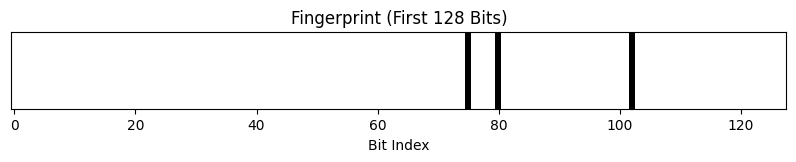

In [ ]:
example_fp = mol_to_fp(example_smiles)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
plt.imshow(example_fp[:128].reshape(1, -1), cmap='Greys', aspect='auto')
plt.title("Fingerprint (First 128 Bits)")
plt.yticks([])
plt.xlabel("Bit Index")
plt.show()

In [ ]:
from tqdm import tqdm

fp_list = []
valid_rows = []

for idx, row in tqdm(merged.iterrows(), total=merged.shape[0], desc="Generating Fingerprints"):
    fp = mol_to_fp(row['SMILES'])
    if fp is not None:
        fp_list.append(fp)
        valid_rows.append(idx)

X_fp = np.array(fp_list)
y_fp = merged.loc[valid_rows, 'sensitivity_label'].values

Generating Fingerprints: 100%|██████████| 96103/96103 [02:11<00:00, 732.16it/s] 


Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train_fp, X_test_fp, y_train_fp, y_test_fp = train_test_split(
    X_fp, y_fp, test_size=0.2, stratify=y_fp, random_state=42
)

Train a Simple Model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

clf = LogisticRegression(max_iter=1000, class_weight='balanced')
clf.fit(X_train_fp, y_train_fp)

y_pred_fp = clf.predict(X_test_fp)
y_prob_fp = clf.predict_proba(X_test_fp)[:, 1]

Evaluate

In [ ]:
from sklearn.metrics import confusion_matrix

print("=== Evaluation: Fingerprints + Logistic Regression ===")
print("AUROC:", roc_auc_score(y_test_fp, y_prob_fp))
print(classification_report(y_test_fp, y_pred_fp))
print("Confusion Matrix:\n", confusion_matrix(y_test_fp, y_pred_fp))

=== Evaluation: Fingerprints + Logistic Regression ===
AUROC: 0.8461901096077283
              precision    recall  f1-score   support

           0       0.62      0.76      0.69      6338
           1       0.87      0.77      0.82     12883

    accuracy                           0.77     19221
   macro avg       0.75      0.77      0.75     19221
weighted avg       0.79      0.77      0.77     19221

Confusion Matrix:
 [[4826 1512]
 [2923 9960]]


## SMILES -> 1D CNN

In [ ]:
print("SMILES:", example_smiles)

SMILES: C1=NC(=NC(=O)N1C2C(C(C(O2)CO)O)O)N


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Use valid rows from previous fingerprinting step
smiles_list = merged.loc[valid_rows, 'SMILES'].tolist()
labels = merged.loc[valid_rows, 'sensitivity_label'].values

# Tokenize at character level
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(smiles_list)
X_smiles_seq = tokenizer.texts_to_sequences(smiles_list)
X_smiles_pad = pad_sequences(X_smiles_seq, maxlen=100, padding='post')

# Train/test split
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_smiles_pad, labels, test_size=0.2, stratify=labels, random_state=42
)

 Build and Train the 1D CNN

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

model_sm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=32, input_length=100),
    tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_sm.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy', tf.keras.metrics.AUC(name='AUROC')])

model_sm.fit(X_train_sm, y_train_sm, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - AUROC: 0.7121 - accuracy: 0.7173 - loss: 0.5624 - val_AUROC: 0.8366 - val_accuracy: 0.7762 - val_loss: 0.4714
Epoch 2/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUROC: 0.8277 - accuracy: 0.7812 - loss: 0.4699 - val_AUROC: 0.8410 - val_accuracy: 0.7825 - val_loss: 0.4692
Epoch 3/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUROC: 0.8340 - accuracy: 0.7801 - loss: 0.4658 - val_AUROC: 0.8418 - val_accuracy: 0.7843 - val_loss: 0.4563
Epoch 4/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUROC: 0.8362 - accuracy: 0.7866 - loss: 0.4609 - val_AUROC: 0.8418 - val_accuracy: 0.7851 - val_loss: 0.4565
Epoch 5/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - AUROC: 0.8334 - accuracy: 0.7850 - loss: 0.4664 - val_AUROC: 0.8428 - val_accuracy: 0.7793 - val_loss: 0.4629
Epoch 6/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - AUROC: 0.8346 - accuracy: 0.7837 - loss: 0.4627 - val_AUROC: 0.8428 - val_accuracy: 0.7873 - val_loss: 0.4526
E

In [ ]:
loss, acc, auc = model_sm.evaluate(X_test_sm, y_test_sm)
print("=== Evaluation: SMILES + 1D CNN ===")
print(f"Accuracy: {acc:.3f}, AUROC: {auc:.3f}")

601/601 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUROC: 0.8408 - accuracy: 0.7815 - loss: 0.4544
=== Evaluation: SMILES + 1D CNN ===
Accuracy: 0.785, AUROC: 0.843


## Graphs -> GCN (with PyTorch Geometric)

In [ ]:
# # below cell is better
# ! pip install torch

In [ ]:
# Torch-Geometric dependencies
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.1.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.4 MB/s eta 0:00:00


In [ ]:
from torch_geometric.data import Data
from rdkit import Chem
import torch

# Simple atom featurizer (atomic number only)
def mol_to_graph(smiles, label):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None: return None

        x = torch.tensor([[atom.GetAtomicNum()] for atom in mol.GetAtoms()], dtype=torch.float)

        edge_index = []
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            edge_index.append([i, j])
            edge_index.append([j, i])
        edge_index = torch.tensor(edge_index, dtype=torch.long).T.contiguous()

        y = torch.tensor([label], dtype=torch.float)
        return Data(x=x, edge_index=edge_index, y=y)
    except:
        return None

# Build dataset
graph_data = []
for s, l in zip(smiles_list, labels):
    g = mol_to_graph(s, l)
    if g is not None:
        graph_data.append(g)


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

Define GCN Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 64)
        self.conv2 = GCNConv(64, 32)
        self.lin = nn.Linear(32, 1)

    def forward(self, x, edge_index, batch):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return torch.sigmoid(self.lin(x)).squeeze()

Train GCN Model

In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split

# Split PyG data
train_graphs, test_graphs = train_test_split(graph_data, test_size=0.2, random_state=42)
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
test_loader = DataLoader(test_graphs, batch_size=32)

# Model and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_gcn = GCN().to(device)
optimizer = torch.optim.Adam(model_gcn.parameters(), lr=0.001)
loss_fn = nn.BCELoss()

# Training loop
for epoch in range(1, 11):
    model_gcn.train()
    total_loss = 0
    for batch in train_loader:
        batch = batch.to(device)
        out = model_gcn(batch.x, batch.edge_index, batch.batch)
        loss = loss_fn(out, batch.y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    print(f"Epoch {epoch}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 1530.2566
Epoch 2, Loss: 1526.3084
Epoch 3, Loss: 1524.9505
Epoch 4, Loss: 1523.9958
Epoch 5, Loss: 1522.7482
Epoch 6, Loss: 1520.6978
Epoch 7, Loss: 1518.8483
Epoch 8, Loss: 1515.6286
Epoch 9, Loss: 1513.5366
Epoch 10, Loss: 1512.6473


In [ ]:
! pip install networkx

Visualizing Individual Graph Structures

In [ ]:
mol = Chem.MolFromSmiles(example_smiles)
atoms = [atom.GetSymbol() for atom in mol.GetAtoms()]
bonds = [(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType()) for bond in mol.GetBonds()]
print("Atoms:", atoms)
print("Bonds:", bonds)

Atoms: ['C', 'N', 'C', 'N', 'C', 'O', 'N', 'C', 'C', 'C', 'C', 'O', 'C', 'O', 'O', 'O', 'N']
Bonds: [(0, 1, rdkit.Chem.rdchem.BondType.AROMATIC), (1, 2, rdkit.Chem.rdchem.BondType.AROMATIC), (2, 3, rdkit.Chem.rdchem.BondType.AROMATIC), (3, 4, rdkit.Chem.rdchem.BondType.AROMATIC), (4, 5, rdkit.Chem.rdchem.BondType.DOUBLE), (4, 6, rdkit.Chem.rdchem.BondType.AROMATIC), (6, 7, rdkit.Chem.rdchem.BondType.SINGLE), (7, 8, rdkit.Chem.rdchem.BondType.SINGLE), (8, 9, rdkit.Chem.rdchem.BondType.SINGLE), (9, 10, rdkit.Chem.rdchem.BondType.SINGLE), (10, 11, rdkit.Chem.rdchem.BondType.SINGLE), (10, 12, rdkit.Chem.rdchem.BondType.SINGLE), (12, 13, rdkit.Chem.rdchem.BondType.SINGLE), (9, 14, rdkit.Chem.rdchem.BondType.SINGLE), (8, 15, rdkit.Chem.rdchem.BondType.SINGLE), (2, 16, rdkit.Chem.rdchem.BondType.SINGLE), (6, 0, rdkit.Chem.rdchem.BondType.AROMATIC), (11, 7, rdkit.Chem.rdchem.BondType.SINGLE)]


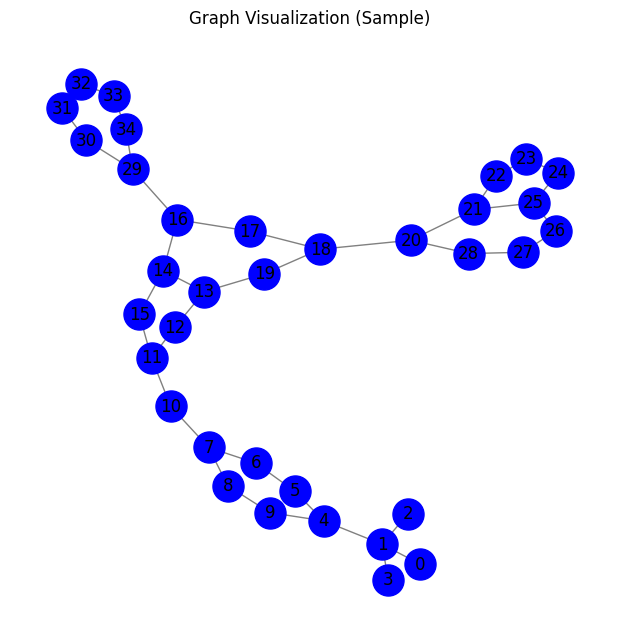

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

# Convert PyG graph to networkx
graph = train_graphs[0]  # Select a sample graph
G = to_networkx(graph, to_undirected=True)

# Plot
plt.figure(figsize=(6,6))
nx.draw(G, node_size=500, node_color='blue', edge_color='gray', with_labels=True)
plt.title("Graph Visualization (Sample)")
plt.show()

Evaluate GCN

In [ ]:
from sklearn.metrics import roc_auc_score

model_gcn.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = batch.to(device)
        pred = model_gcn(batch.x, batch.edge_index, batch.batch).cpu().numpy()
        label = batch.y.cpu().numpy()
        all_preds.extend(pred)
        all_labels.extend(label)

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
auc_gcn = roc_auc_score(all_labels, all_preds)
print("=== Evaluation: Graphs + GCN ===")
print(f"AUROC: {auc_gcn:.3f}")


=== Evaluation: Graphs + GCN ===
AUROC: 0.540


## Compare AUROC

In [ ]:
auroc_scores = {
    "Fingerprints + LR": roc_auc_score(y_test_fp, y_prob_fp),
    "SMILES + 1D CNN": auc,
    "Graphs + GCN": auc_gcn
}

In [ ]:
print(auroc_scores)

{'Fingerprints + LR': np.float64(0.8461901096077283), 'SMILES + 1D CNN': 0.8433935046195984, 'Graphs + GCN': np.float64(0.5399317072938916)}


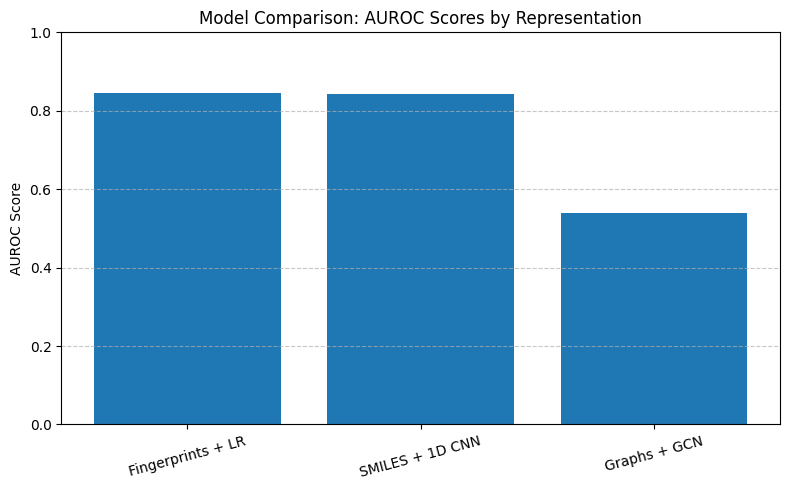

In [ ]:
# Plot AUROC Scores
models = list(auroc_scores.keys())
scores = list(auroc_scores.values())

plt.figure(figsize=(8, 5))
plt.bar(models, scores)
plt.title("Model Comparison: AUROC Scores by Representation")
plt.ylabel("AUROC Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Compare Runtime

In [ ]:
import time

# --- Timing helper
def time_training(func, *args, **kwargs):
    start = time.time()
    result = func(*args, **kwargs)
    end = time.time()
    return result, end - start

# --- Fingerprint + Logistic Regression
def train_fingerprint_model():
    clf.fit(X_train_fp, y_train_fp)
    return clf

# --- SMILES + 1D CNN
def train_smiles_model():
    return model_sm.fit(
        X_train_sm, y_train_sm,
        validation_split=0.2,
        epochs=10,
        batch_size=32,
        verbose=1
    )

# --- GCN
def train_gcn_model():
    for epoch in range(1, 11):
        model_gcn.train()
        for batch in train_loader:
            batch = batch.to(device)
            out = model_gcn(batch.x, batch.edge_index, batch.batch)
            loss = loss_fn(out, batch.y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    return model_gcn

# --- Run All
_, fp_time = time_training(train_fingerprint_model)
_, sm_time = time_training(train_smiles_model)
_, gcn_time = time_training(train_gcn_model)

print(f"Fingerprint Model Training Time: {fp_time:.2f} seconds")
print(f"SMILES 1D CNN Training Time: {sm_time:.2f} seconds")
print(f"GCN Training Time: {gcn_time:.2f} seconds")

Epoch 1/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - AUROC: 0.8390 - accuracy: 0.7882 - loss: 0.4575 - val_AUROC: 0.8436 - val_accuracy: 0.7873 - val_loss: 0.4531
Epoch 2/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUROC: 0.8389 - accuracy: 0.7863 - loss: 0.4596 - val_AUROC: 0.8437 - val_accuracy: 0.7849 - val_loss: 0.4557
Epoch 3/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - AUROC: 0.8420 - accuracy: 0.7896 - loss: 0.4549 - val_AUROC: 0.8443 - val_accuracy: 0.7866 - val_loss: 0.4514
Epoch 4/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUROC: 0.8433 - accuracy: 0.7917 - loss: 0.4515 - val_AUROC: 0.8443 - val_accuracy: 0.7860 - val_loss: 0.4503
Epoch 5/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - AUROC: 0.8414 - accuracy: 0.7887 - loss: 0.4560 - val_AUROC: 0.8443 - val_accuracy: 0.7866 - val_loss: 0.4523
Epoch 6/10
1923/1923 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - AUROC: 0.8409 - accuracy: 0.7866 - loss: 0.4569 - val_AUROC: 0.8438 - val_accuracy: 0.7871 - val_loss: 0.4540
E

# Baseline model

In [ ]:
# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Fingerprints Architecture (MLP)

In [ ]:
# Dataset Information Display for Molecular Fingerprint Model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def display_dataset_info(X_train, X_test, y_train, y_test, X_eval=None, y_eval=None):
    """
    Display comprehensive information about training, testing, and evaluation sets
    """

    print("="*60)
    print("DATASET OVERVIEW")
    print("="*60)

    # Training Set Information
    print("\n TRAINING SET:")
    print(f"   Shape: {X_train.shape}")
    print(f"   Features: {X_train.shape[1]} (fingerprint dimensions)")
    print(f"   Samples: {X_train.shape[0]}")
    print(f"   Positive samples: {np.sum(y_train)} ({np.mean(y_train)*100:.1f}%)")
    print(f"   Negative samples: {len(y_train) - np.sum(y_train)} ({(1-np.mean(y_train))*100:.1f}%)")
    print(f"   Sample fingerprint values range: [{X_train.min():.3f}, {X_train.max():.3f}]")

    # Testing Set Information
    print("\n TESTING SET:")
    print(f"   Shape: {X_test.shape}")
    print(f"   Features: {X_test.shape[1]} (fingerprint dimensions)")
    print(f"   Samples: {X_test.shape[0]}")
    print(f"   Positive samples: {np.sum(y_test)} ({np.mean(y_test)*100:.1f}%)")
    print(f"   Negative samples: {len(y_test) - np.sum(y_test)} ({(1-np.mean(y_test))*100:.1f}%)")
    print(f"   Sample fingerprint values range: [{X_test.min():.3f}, {X_test.max():.3f}]")

    # Evaluation Set Information (if provided)
    if X_eval is not None and y_eval is not None:
        print("\n EVALUATION SET:")
        print(f"   Shape: {X_eval.shape}")
        print(f"   Features: {X_eval.shape[1]} (fingerprint dimensions)")
        print(f"   Samples: {X_eval.shape[0]}")
        print(f"   Positive samples: {np.sum(y_eval)} ({np.mean(y_eval)*100:.1f}%)")
        print(f"   Negative samples: {len(y_eval) - np.sum(y_eval)} ({(1-np.mean(y_eval))*100:.1f}%)")
        print(f"   Sample fingerprint values range: [{X_eval.min():.3f}, {X_eval.max():.3f}]")

    print("\n" + "="*60)
    print("DATASET STATISTICS")
    print("="*60)

    total_samples = X_train.shape[0] + X_test.shape[0]
    if X_eval is not None:
        total_samples += X_eval.shape[0]

    print(f"Total samples: {total_samples}")
    print(f"Train/Test split: {X_train.shape[0]}/{X_test.shape[0]} ({X_train.shape[0]/total_samples*100:.1f}%/{X_test.shape[0]/total_samples*100:.1f}%)")
    if X_eval is not None:
        print(f"Evaluation samples: {X_eval.shape[0]} ({X_eval.shape[0]/total_samples*100:.1f}%)")

    # Feature statistics
    print(f"\nFingerprint feature statistics:")
    print(f"   Non-zero features per sample (avg): {np.mean(np.count_nonzero(X_train, axis=1)):.1f}")
    print(f"   Sparsity: {(1 - np.count_nonzero(X_train) / X_train.size)*100:.1f}%")

def display_sample_data(X_train, y_train, n_samples=5):
    """
    Display first few samples from training set
    """
    print("\n" + "="*60)
    print(" SAMPLE DATA (First {} training samples)".format(n_samples))
    print("="*60)

    for i in range(min(n_samples, len(X_train))):
        non_zero_indices = np.where(X_train[i] != 0)[0]
        print(f"\nSample {i+1}:")
        print(f"   Label: {int(y_train[i])} ({'Responsive' if y_train[i] == 1 else 'Non-responsive'})")
        print(f"   Non-zero fingerprint bits: {len(non_zero_indices)}/{len(X_train[i])}")
        print(f"   Non-zero positions (first 10): {non_zero_indices[:10].tolist()}")
        print(f"   Non-zero values (first 10): {X_train[i][non_zero_indices[:10]].tolist()}")

X_train, X_test, y_train, y_test = train_test_split(
    X_fp, y_fp,
    test_size=0.35, random_state=42, stratify=y_fp
)


# Display dataset information
display_dataset_info(X_train, X_test, y_train, y_test)

# Display sample data
display_sample_data(X_train, y_train, n_samples=5)


DATASET OVERVIEW

 TRAINING SET:
   Shape: (62466, 1024)
   Features: 1024 (fingerprint dimensions)
   Samples: 62466
   Positive samples: 41868 (67.0%)
   Negative samples: 20598 (33.0%)
   Sample fingerprint values range: [0.000, 1.000]

 TESTING SET:
   Shape: (33637, 1024)
   Features: 1024 (fingerprint dimensions)
   Samples: 33637
   Positive samples: 22545 (67.0%)
   Negative samples: 11092 (33.0%)
   Sample fingerprint values range: [0.000, 1.000]

DATASET STATISTICS
Total samples: 96103
Train/Test split: 62466/33637 (65.0%/35.0%)

Fingerprint feature statistics:
   Non-zero features per sample (avg): 53.0
   Sparsity: 94.8%

 SAMPLE DATA (First 5 training samples)

Sample 1:
   Label: 0 (Non-responsive)
   Non-zero fingerprint bits: 31/1024
   Non-zero positions (first 10): [33, 90, 139, 140, 147, 179, 236, 258, 309, 342]
   Non-zero values (first 10): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Sample 2:
   Label: 1 (Responsive)
   Non-zero fingerprint bits: 52/1024
   Non-zero positions

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_fp = Sequential([
    Dense(256, activation='relu', input_shape=(1024,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_fp.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278,913 (1.06 MB)

 Trainable params: 278,913 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile with optimized settings
model_fp.compile(
    optimizer=Adam(learning_rate=0.001),  # Lower learning rate for stability
    loss='binary_crossentropy',
    metrics=['accuracy', 'auc']  # Track AUC for drug response evaluation
)

# Advanced training with callbacks
checkpoint = ModelCheckpoint(
    filepath='fingerprint_model_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    monitor='val_auc',  # Monitor AUC instead of loss
    save_best_only=True
)

early_stop = EarlyStopping(
    monitor='val_auc',
    patience=10,  # Higher patience for molecular data
    restore_best_weights=True,
    mode='max'  # Maximize AUC
)

# Training with molecular-specific settings
history = model_fp.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7658 - auc: 0.8129 - loss: 0.4852 - val_accuracy: 0.7837 - val_auc: 0.8407 - val_loss: 0.4544
Epoch 2/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7859 - auc: 0.8404 - loss: 0.4549 - val_accuracy: 0.7860 - val_auc: 0.8439 - val_loss: 0.4506
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7865 - auc: 0.8428 - loss: 0.4536 - val_accuracy: 0.7863 - val_auc: 0.8436 - val_loss: 0.4510
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7917 - auc: 0.8438 - loss: 0.4501 - val_accuracy: 0.7872 - val_auc: 0.8443 - val_loss: 0.4501
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7867 - auc: 0.8439 - loss: 0.4517 - val_accuracy: 0.7876 - val_auc: 0.8444 - val_loss: 0.4496
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7907 - auc: 0.8479 - loss: 0.4460 - val_accuracy: 0.7879 - val_auc: 0.8439 - val_loss: 0.4519
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Save model in H5 format
model_fp.save("baseline_fingerprint_model.h5")

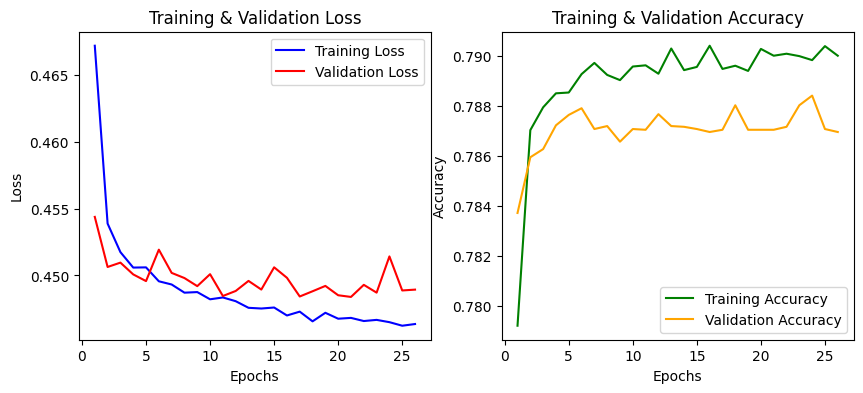

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
epochs = range(1, len(history.history['loss']) + 1)

# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Plot Accuracy (and AUROC if applicable)
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()

## SMILES Architecture (1D CNN)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# === 1. Tokenize SMILES ===
smiles_list = merged['SMILES'].astype(str).tolist()  # Ensure all SMILES are strings

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(smiles_list)
sequences = tokenizer.texts_to_sequences(smiles_list)

# === 2. Pad sequences ===
MAXLEN = 100
padded_sequences = pad_sequences(sequences, maxlen=MAXLEN, padding='post', truncating='post')

# === 3. Extract corresponding labels ===
labels = merged['sensitivity_label'].values

# === 4. Train/test split ===
from sklearn.model_selection import train_test_split
X_smiles_train, X_smiles_test, y_smiles_train, y_smiles_test = train_test_split(
    padded_sequences, labels, test_size=0.35, stratify=labels, random_state=42
)

# === 5. Get vocab size ===
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding index

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Concatenate

smiles_input = Input(shape=(100,))
vocab_size = 40  # Example: set this based on tokenizer.word_index + 1
x = Embedding(input_dim=vocab_size, output_dim=32)(smiles_input)
x = Conv1D(64, kernel_size=5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
smiles_output = Dense(1, activation='sigmoid')(x)

model_sm = Model(inputs=smiles_input, outputs=smiles_output)

model_sm.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 100, 32)        │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 96, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,697 (53.50 KB)

 Trainable params: 13,697 (53.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# rename
X_train_smiles = X_smiles_train
X_test_smiles = X_smiles_test
y_train_smiles = y_smiles_train
y_test_smiles = y_smiles_test


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile
model_sm.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Callbacks
checkpoint_sm = ModelCheckpoint(
    filepath='smiles_model_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

early_stop_sm = EarlyStopping(
    monitor='val_auc',
    patience=10,
    restore_best_weights=True,
    mode='max'
)

# Fit (example variables: X_train_smiles, X_test_smiles)
history_sm = model_sm.fit(
    X_train_smiles, y_train_smiles,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_smiles, y_test_smiles),
    callbacks=[checkpoint, early_stop],
    verbose=1
)

Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - AUC: 0.6840 - accuracy: 0.7021 - loss: 0.5787 - val_AUC: 0.8365 - val_accuracy: 0.7802 - val_loss: 0.4699
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_auc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


977/977 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - AUC: 0.8308 - accuracy: 0.7821 - loss: 0.4676 - val_AUC: 0.8408 - val_accuracy: 0.7838 - val_loss: 0.4564
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8352 - accuracy: 0.7840 - loss: 0.4611 - val_AUC: 0.8417 - val_accuracy: 0.7789 - val_loss: 0.4636
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - AUC: 0.8366 - accuracy: 0.7869 - loss: 0.4590 - val_AUC: 0.8411 - val_accuracy: 0.7851 - val_loss: 0.4616
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8362 - accuracy: 0.7843 - loss: 0.4617 - val_AUC: 0.8425 - val_accuracy: 0.7858 - val_loss: 0.4524
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8385 - accuracy: 0.7848 - loss: 0.4589 - val_AUC: 0.8418 - val_accuracy: 0.7821 - val_loss: 0.4631
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8350 - accuracy: 0.7825 - loss: 0.4648 - val_AUC: 0.8427 - val_accuracy: 0.7843 - val_loss: 0.4538
Epoch 8/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/ste

In [ ]:
# Save model in H5 format
model_sm.save("baseline_smiles_model.h5")

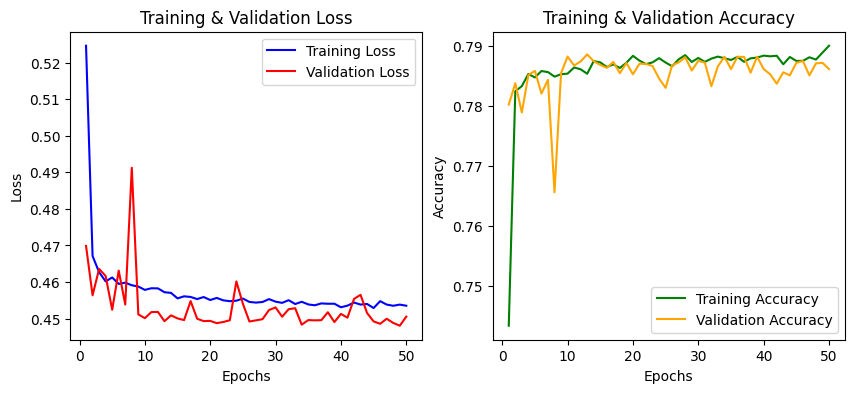

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
epochs = range(1, len(history_sm.history['loss']) + 1)

# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_sm.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs, history_sm.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Plot Accuracy (and AUROC if applicable)
plt.subplot(1, 2, 2)
plt.plot(epochs, history_sm.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(epochs, history_sm.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()

## Multi-Modal Architecture (Fingerprints + SMILES)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract SMILES strings
smiles_list = merged.loc[valid_rows, 'SMILES'].astype(str).tolist()

# Tokenize (character-level)
tokenizer = Tokenizer(char_level=True)  # character-wise tokenization
tokenizer.fit_on_texts(smiles_list)

# Convert to sequences
smiles_seq = tokenizer.texts_to_sequences(smiles_list)

# Pad to fixed length (choose maxlen or 100 as example)
maxlen = 100
padded_smiles = pad_sequences(smiles_seq, maxlen=maxlen, padding='post', truncating='post')

# Confirm shape
print(padded_smiles.shape)

(96103, 100)


In [ ]:
# These must match
assert X_fp.shape[0] == len(padded_smiles) == len(y_fp)

In [ ]:
# splitting
from sklearn.model_selection import train_test_split

X_train_fp, X_test_fp, X_train_smiles, X_test_smiles, y_train, y_test = train_test_split(
    X_fp, padded_smiles, y_fp,
    test_size=0.35, random_state=42, stratify=y_fp
)


In [ ]:
from tensorflow.keras.layers import concatenate

# Fingerprint branch
fp_input = Input(shape=(1024,))
fp_branch = Dense(128, activation='relu')(fp_input)
fp_branch = Dense(64, activation='relu')(fp_branch)

# SMILES branch (reuse architecture above)
sm_branch = Embedding(input_dim=vocab_size, output_dim=32)(smiles_input)
sm_branch = Conv1D(64, kernel_size=5, activation='relu')(sm_branch)
sm_branch = GlobalMaxPooling1D()(sm_branch)
sm_branch = Dense(64, activation='relu')(sm_branch)

# Fusion
combined = concatenate([fp_branch, sm_branch])
combined = Dense(64, activation='relu')(combined)
combined = Dropout(0.3)(combined)
combined_output = Dense(1, activation='sigmoid')(combined)

model_multi = Model(inputs=[fp_input, smiles_input], outputs=combined_output)

model_multi.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 100, 32)   │        992 │ input_layer_6[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_11      │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 96, 64)    │     10,304 │ embedding_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 128)       │    131,200 │ input_layer_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_9[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 64)        │      8,256 │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 64)        │      4,160 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 128)       │          0 │ dense_40[0][0],   │
│ (Concatenate)       │                   │            │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 64)        │      8,256 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_42[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 1)         │         65 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 163,233 (637.63 KB)

 Trainable params: 163,233 (637.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model_multi.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Callbacks
checkpoint_multi = ModelCheckpoint(
    filepath='multi_model_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

early_stop_multi = EarlyStopping(
    monitor='val_auc',
    patience=10,
    restore_best_weights=True,
    mode='max'
)

# Fit (example variables: [X_train_fp, X_train_sm], [X_test_fp, X_test_sm])
history_multi = model_multi.fit(
    [X_train_fp, X_train_smiles], y_train,
    epochs=50,
    batch_size=64,
    validation_data=([X_test_fp, X_test_smiles], y_test),
    callbacks=[checkpoint_multi, early_stop_multi],
    verbose=1
)

Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - AUC: 0.8085 - accuracy: 0.7646 - loss: 0.4879 - val_AUC: 0.8403 - val_accuracy: 0.7833 - val_loss: 0.4549
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_auc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


977/977 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - AUC: 0.8395 - accuracy: 0.7874 - loss: 0.4555 - val_AUC: 0.8428 - val_accuracy: 0.7870 - val_loss: 0.4523
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8414 - accuracy: 0.7866 - loss: 0.4540 - val_AUC: 0.8441 - val_accuracy: 0.7875 - val_loss: 0.4557
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8447 - accuracy: 0.7878 - loss: 0.4506 - val_AUC: 0.8439 - val_accuracy: 0.7873 - val_loss: 0.4507
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8460 - accuracy: 0.7881 - loss: 0.4484 - val_AUC: 0.8448 - val_accuracy: 0.7881 - val_loss: 0.4505
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8434 - accuracy: 0.7899 - loss: 0.4500 - val_AUC: 0.8450 - val_accuracy: 0.7879 - val_loss: 0.4499
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - AUC: 0.8468 - accuracy: 0.7912 - loss: 0.4471 - val_AUC: 0.8452 - val_accuracy: 0.7871 - val_loss: 0.4487
Epoch 8/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/ste

In [ ]:
# Save model in H5 format
model_multi.save("baseline_multi_model.h5")

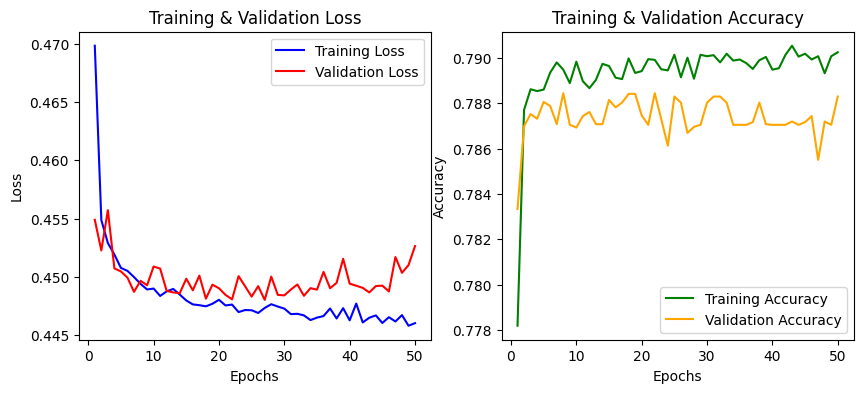

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy
epochs = range(1, len(history_multi.history['loss']) + 1)

# Plot Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_multi.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs, history_multi.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# Plot Accuracy (and AUROC if applicable)
plt.subplot(1, 2, 2)
plt.plot(epochs, history_multi.history['accuracy'], label='Training Accuracy', color='green')
plt.plot(epochs, history_multi.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.show()

## visualize

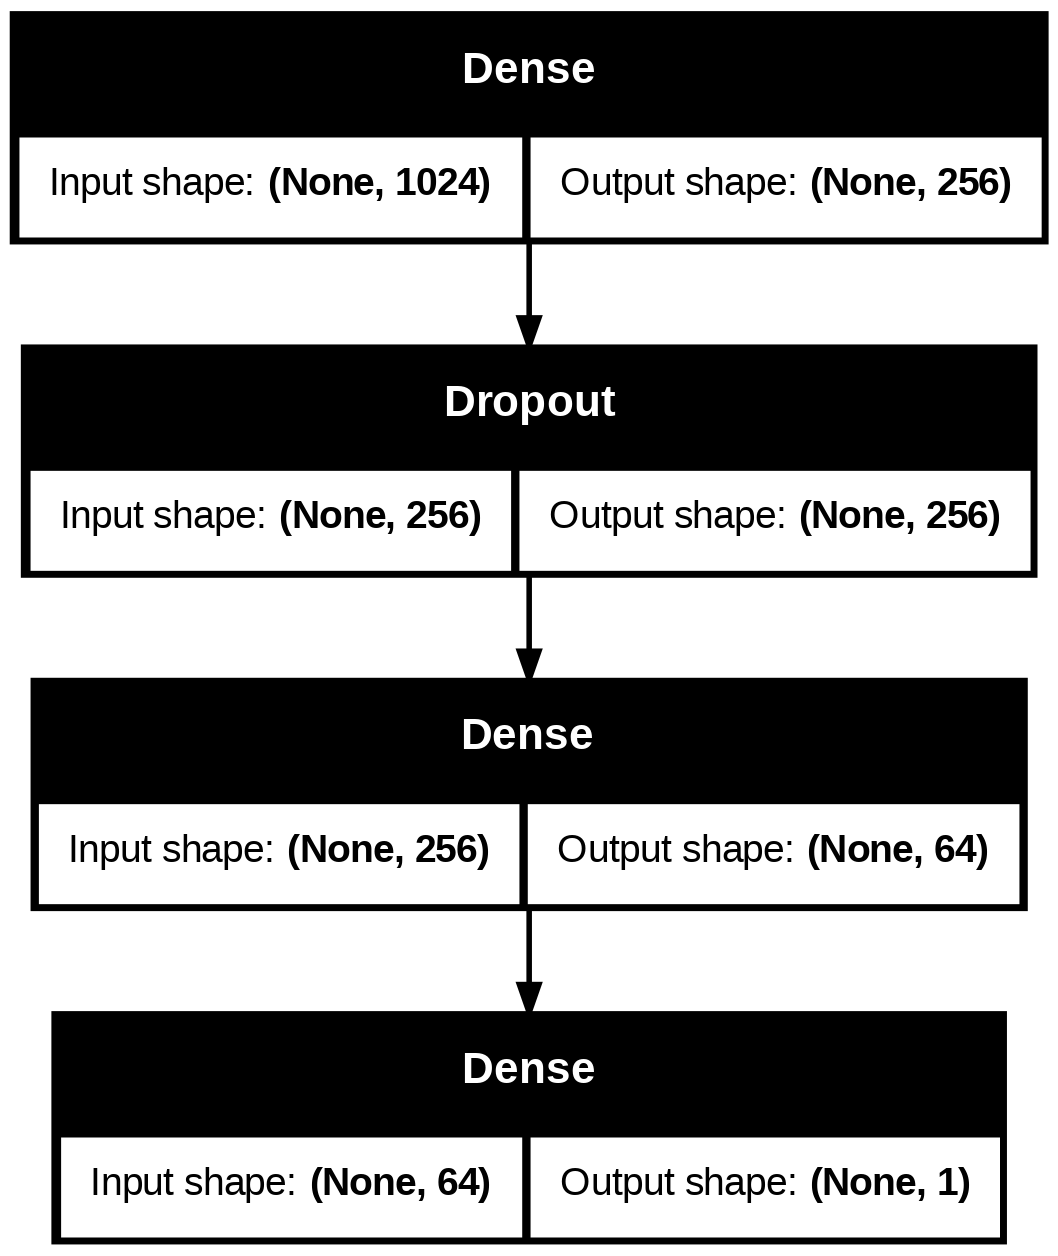

In [ ]:
# Visualize model architectures
from tensorflow.keras.utils import plot_model
plot_model(model_fp, show_shapes=True, to_file="fingerprint_model.png")

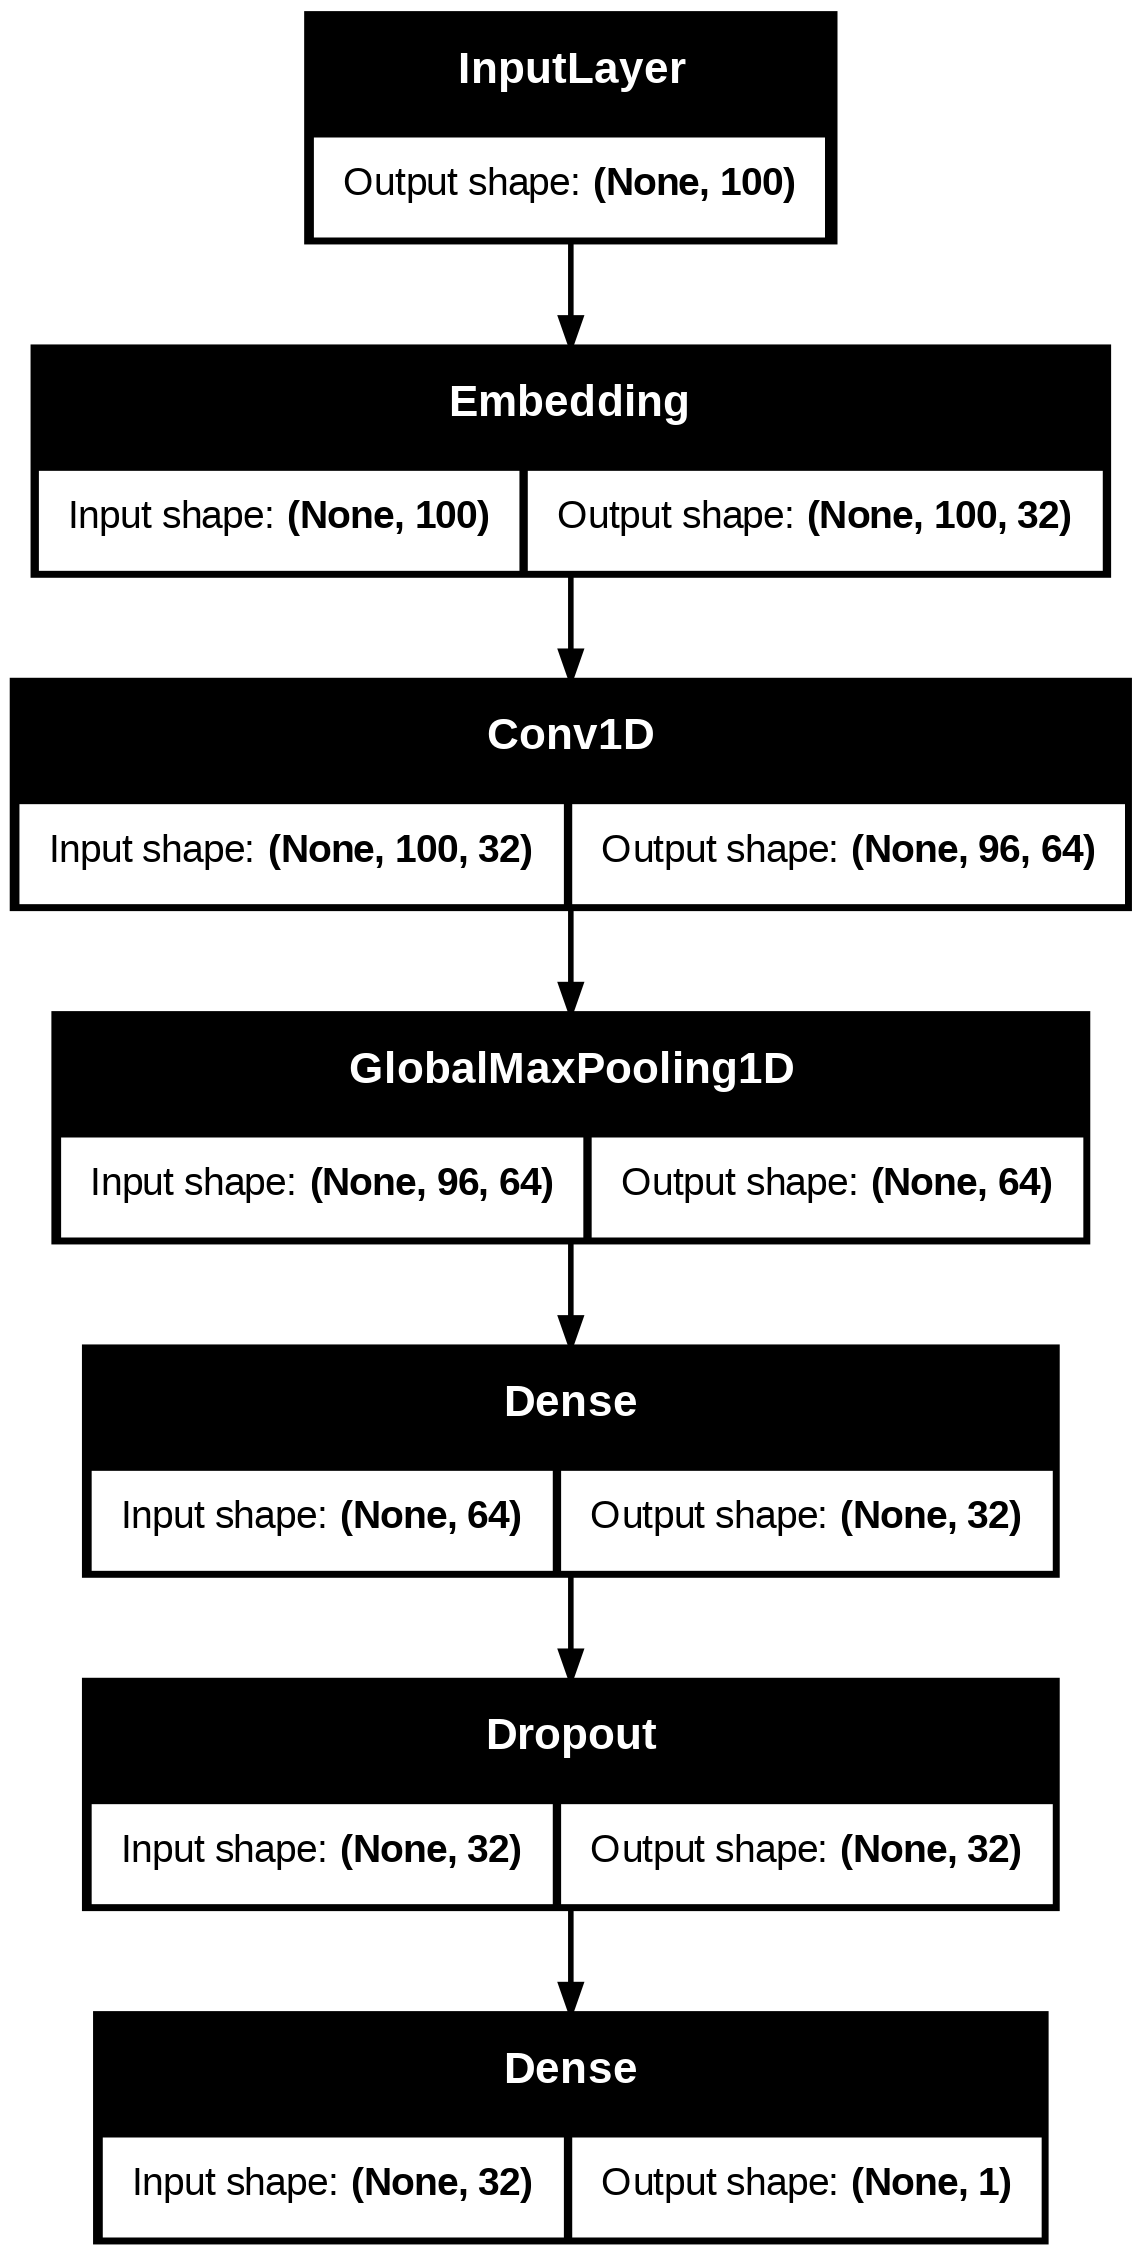

In [ ]:
plot_model(model_sm, show_shapes=True, to_file="smiles_model.png")

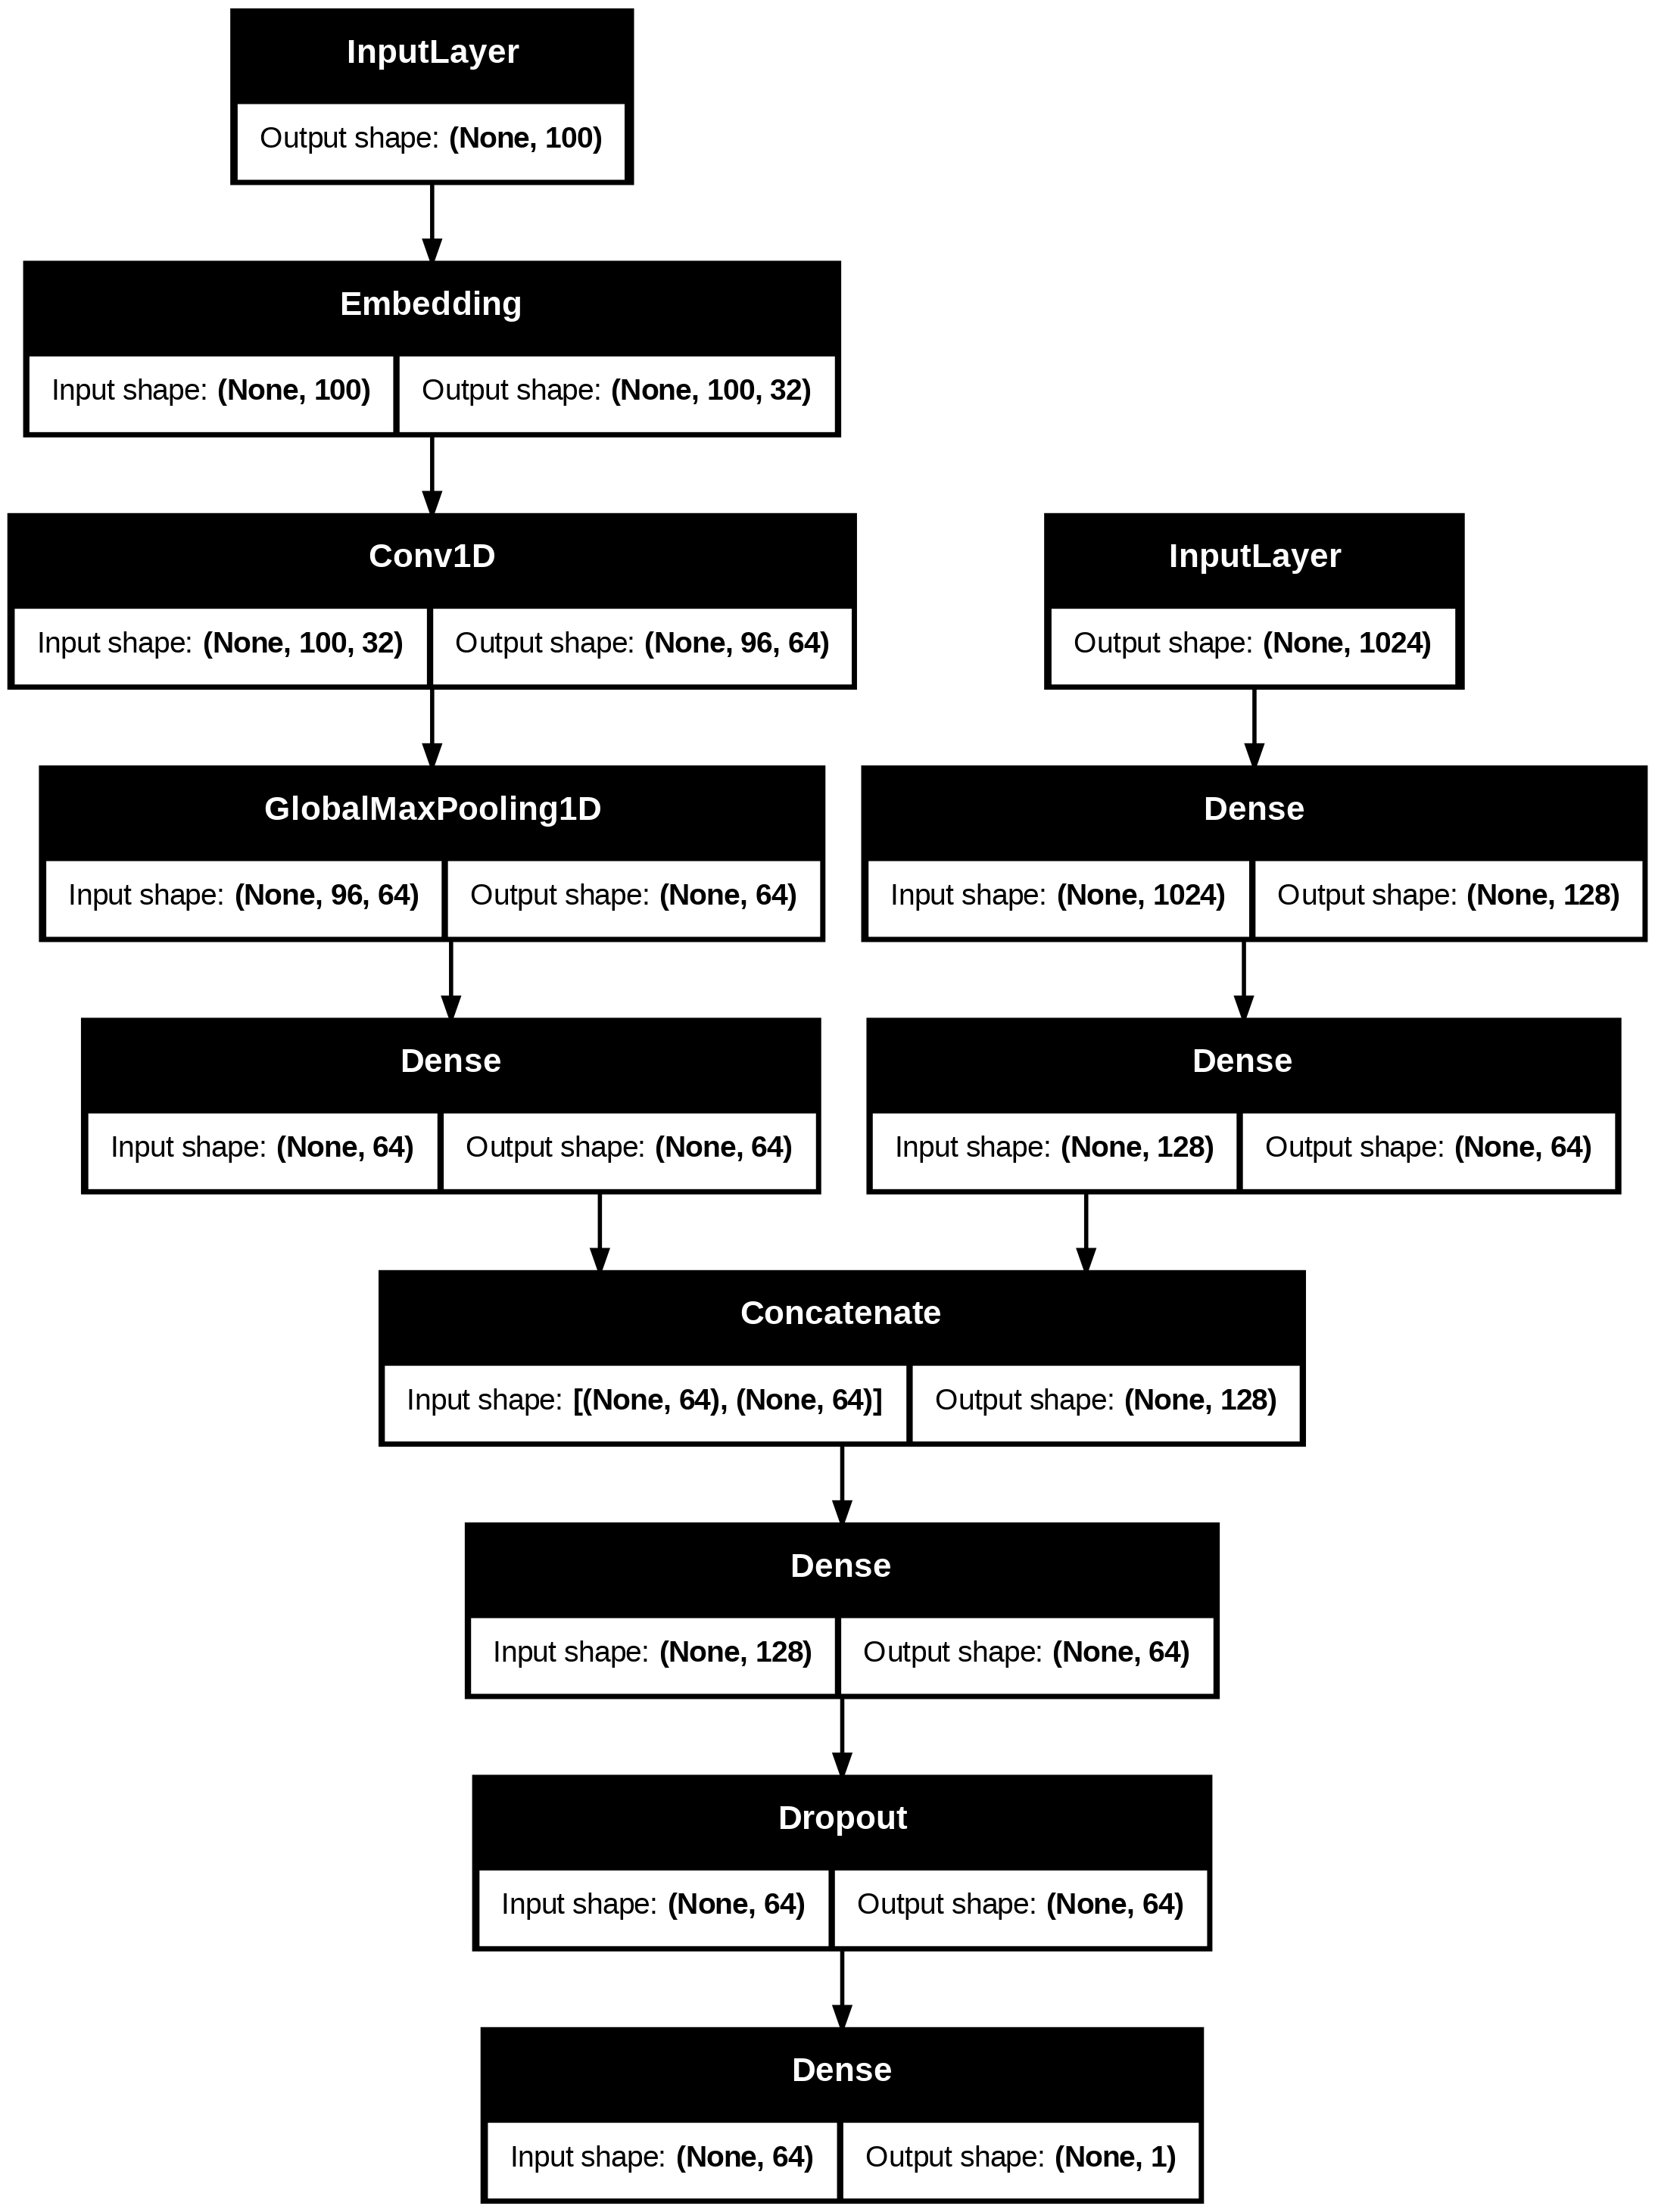

In [ ]:
plot_model(model_multi, show_shapes=True, to_file="multi_modal_model.png")

In [ ]:
# === 1. Evaluate Fingerprint-Only Model (MLP) ===
fp_score = model_fp.evaluate(X_test, y_test, verbose=0)
print("=== Fingerprint Model ===")
print(f"Loss      : {fp_score[0]:.4f}")
print(f"Accuracy  : {fp_score[1]:.4f}")
print(f"AUC       : {fp_score[2]:.4f}\n")

# === 2. Evaluate SMILES-Only Model (1D CNN) ===
sm_score = model_sm.evaluate(X_test_smiles, y_test_smiles, verbose=0)
print("=== SMILES Model ===")
print(f"Loss      : {sm_score[0]:.4f}")
print(f"Accuracy  : {sm_score[1]:.4f}")
print(f"AUC       : {sm_score[2]:.4f}\n")

# === 3. Evaluate Multi-Modal Model (FP + SMILES) ===
multi_score = model_multi.evaluate([X_test_fp, X_test_smiles], y_test, verbose=0)
print("=== Multi-Modal Model ===")
print(f"Loss      : {multi_score[0]:.4f}")
print(f"Accuracy  : {multi_score[1]:.4f}")
print(f"AUC       : {multi_score[2]:.4f}")

=== Fingerprint Model ===
Loss      : 0.4498
Accuracy  : 0.7870
AUC       : 0.8457

=== SMILES Model ===
Loss      : 0.4505
Accuracy  : 0.7861
AUC       : 0.8451

=== Multi-Modal Model ===
Loss      : 0.4527
Accuracy  : 0.7883
AUC       : 0.8461


# Fine-Tuning hyperparameters best baseline (SMILES -> 1D CNN)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Use the same MAXLEN and vocab_size from preprocessing
smiles_input = Input(shape=(MAXLEN,), name="SMILES_Input")

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Shared optimizer
optimizer = Adam(learning_rate=0.001)

# Shared callbacks config
def get_callbacks(model_name):
    return [
        ModelCheckpoint(
            filepath=f"{model_name}_best.weights.h5",
            save_weights_only=True,
            monitor='val_auc',
            save_best_only=True,
            mode='max',
            verbose=1
        ),
        EarlyStopping(
            monitor='val_auc',
            patience=10,
            restore_best_weights=True,
            mode='max',
            verbose=1
        )
    ]

## SM-Light (Low Complexity)

In [ ]:
x_light = Embedding(input_dim=vocab_size, output_dim=32)(smiles_input)
x_light = Conv1D(32, kernel_size=3, activation='relu')(x_light)
x_light = GlobalMaxPooling1D()(x_light)
x_light = Dense(16, activation='relu')(x_light)
x_light = Dropout(0.2)(x_light)
output_light = Dense(1, activation='sigmoid')(x_light)

model_sm_light = Model(inputs=smiles_input, outputs=output_light, name="SMILES_Light")

In [ ]:
model_sm_light.summary()

Model: "SMILES_Light"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ SMILES_Input (InputLayer)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 32)        │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 98, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 32)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,641 (18.13 KB)

 Trainable params: 4,641 (18.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model_sm_light.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Callbacks
checkpoint_light = ModelCheckpoint(
    filepath='smiles_light_best.weights.h5',
    save_weights_only=True,
    monitor='val_auc',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop_light = EarlyStopping(
    monitor='val_auc',
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# Train
history_light = model_sm_light.fit(
    X_train_smiles, y_train_smiles,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_smiles, y_test_smiles),
    callbacks=[checkpoint_light, early_stop_light],
    verbose=1
)


Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - AUC: 0.6427 - accuracy: 0.6910 - loss: 0.5972 - val_AUC: 0.8062 - val_accuracy: 0.7617 - val_loss: 0.5052
Epoch 2/50


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_auc available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,accuracy,loss,val_AUC,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


977/977 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - AUC: 0.8071 - accuracy: 0.7668 - loss: 0.4925 - val_AUC: 0.8296 - val_accuracy: 0.7848 - val_loss: 0.4682
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8234 - accuracy: 0.7806 - loss: 0.4750 - val_AUC: 0.8352 - val_accuracy: 0.7810 - val_loss: 0.4653
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8278 - accuracy: 0.7788 - loss: 0.4709 - val_AUC: 0.8362 - val_accuracy: 0.7786 - val_loss: 0.4659
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8292 - accuracy: 0.7797 - loss: 0.4704 - val_AUC: 0.8375 - val_accuracy: 0.7859 - val_loss: 0.4681
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - AUC: 0.8260 - accuracy: 0.7798 - loss: 0.4734 - val_AUC: 0.8362 - val_accuracy: 0.7659 - val_loss: 0.4943
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8321 - accuracy: 0.7816 - loss: 0.4664 - val_AUC: 0.8411 - val_accuracy: 0.7850 - val_loss: 0.4547
Epoch 8/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/ste

##  SM-Mid (Moderate Complexity)

In [ ]:
x_mid = Embedding(input_dim=vocab_size, output_dim=32)(smiles_input)
x_mid = Conv1D(64, kernel_size=5, activation='relu')(x_mid)
x_mid = GlobalMaxPooling1D()(x_mid)
x_mid = Dense(32, activation='relu')(x_mid)
x_mid = Dropout(0.3)(x_mid)
output_mid = Dense(1, activation='sigmoid')(x_mid)

model_sm_mid = Model(inputs=smiles_input, outputs=output_mid, name="SMILES_Mid")

In [ ]:
model_sm_mid.summary()

Model: "SMILES_Mid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ SMILES_Input (InputLayer)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 100, 32)        │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,409 (52.38 KB)

 Trainable params: 13,409 (52.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model_sm_mid.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Callbacks
checkpoint_mid = ModelCheckpoint(
    filepath='smiles_mid_best.weights.h5',
    save_weights_only=True,
    monitor='val_auc',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop_mid = EarlyStopping(
    monitor='val_auc',
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# Train
history_mid = model_sm_mid.fit(
    X_train_smiles, y_train_smiles,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_smiles, y_test_smiles),
    callbacks=[checkpoint_mid, early_stop_mid],
    verbose=1
)


Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - AUC: 0.6849 - accuracy: 0.7150 - loss: 0.5733 - val_AUC: 0.8358 - val_accuracy: 0.7828 - val_loss: 0.4631
Epoch 2/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - AUC: 0.8255 - accuracy: 0.7806 - loss: 0.4744 - val_AUC: 0.8404 - val_accuracy: 0.7854 - val_loss: 0.4565
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8335 - accuracy: 0.7821 - loss: 0.4640 - val_AUC: 0.8427 - val_accuracy: 0.7846 - val_loss: 0.4598
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8387 - accuracy: 0.7859 - loss: 0.4584 - val_AUC: 0.8418 - val_accuracy: 0.7853 - val_loss: 0.4551
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8374 - accuracy: 0.7865 - loss: 0.4599 - val_AUC: 0.8415 - val_accuracy: 0.7873 - val_loss: 0.4536
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.8369 - accuracy: 0.7851 - loss: 0.4580 - val_AUC: 0.8430 - val_accuracy: 0.7857 - val_loss: 0.4584
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━━━

##  SM-High (High Complexity)

In [ ]:
x_high = Embedding(input_dim=vocab_size, output_dim=32)(smiles_input)
x_high = Conv1D(128, kernel_size=5, activation='relu')(x_high)
x_high = GlobalMaxPooling1D()(x_high)
x_high = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_high)
x_high = BatchNormalization()(x_high)
x_high = Dropout(0.5)(x_high)
x_high = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(x_high)
x_high = BatchNormalization()(x_high)
x_high = Dropout(0.5)(x_high)
output_high = Dense(1, activation='sigmoid')(x_high)

model_sm_high = Model(inputs=smiles_input, outputs=output_high, name="SMILES_High")

In [ ]:
model_sm_high.summary()

Model: "SMILES_High"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ SMILES_Input (InputLayer)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 100, 32)        │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 96, 128)        │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,353 (126.38 KB)

 Trainable params: 32,161 (125.63 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Compile
model_sm_high.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# Callbacks
checkpoint_high = ModelCheckpoint(
    filepath='smiles_high_best.weights.h5',
    save_weights_only=True,
    monitor='val_auc',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stop_high = EarlyStopping(
    monitor='val_auc',
    patience=10,
    restore_best_weights=True,
    mode='max',
    verbose=1
)

# Train
history_high = model_sm_high.fit(
    X_train_smiles, y_train_smiles,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_smiles, y_test_smiles),
    callbacks=[checkpoint_high, early_stop_high],
    verbose=1
)

Epoch 1/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - AUC: 0.7012 - accuracy: 0.6856 - loss: 1.2211 - val_AUC: 0.8255 - val_accuracy: 0.7239 - val_loss: 0.5900
Epoch 2/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - AUC: 0.8147 - accuracy: 0.7701 - loss: 0.5315 - val_AUC: 0.8320 - val_accuracy: 0.7561 - val_loss: 0.5156
Epoch 3/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8259 - accuracy: 0.7818 - loss: 0.4850 - val_AUC: 0.8366 - val_accuracy: 0.7491 - val_loss: 0.4998
Epoch 4/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8238 - accuracy: 0.7757 - loss: 0.4873 - val_AUC: 0.8305 - val_accuracy: 0.7346 - val_loss: 0.5417
Epoch 5/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8232 - accuracy: 0.7773 - loss: 0.4869 - val_AUC: 0.8363 - val_accuracy: 0.7815 - val_loss: 0.4769
Epoch 6/50
977/977 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8226 - accuracy: 0.7769 - loss: 0.4895 - val_AUC: 0.8359 - val_accuracy: 0.7548 - val_loss: 0.5258
Epoch 7/50
977/977 ━━━━━━━━━━━━━━━━━━

## evaluation

In [ ]:
# Save the entire model to .h5
model_sm_high.save('smiles_high_model.h5')
model_sm_mid.save('smiles_mid_model.h5')
model_sm_light.save('smiles_light_model.h5')

In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(history, title):
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Binary Crossentropy')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


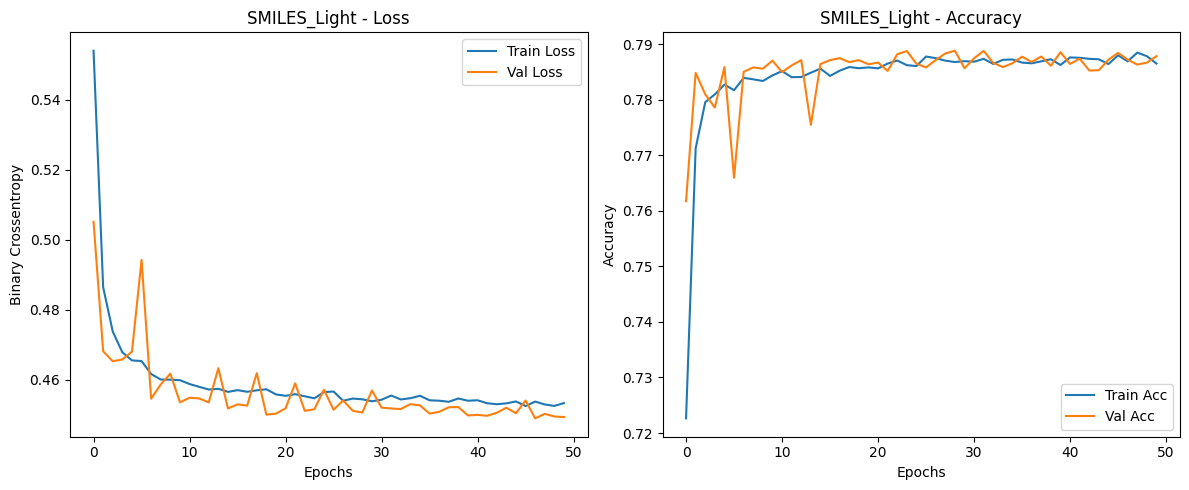

In [ ]:
plot_training_curves(history_light, "SMILES_Light")

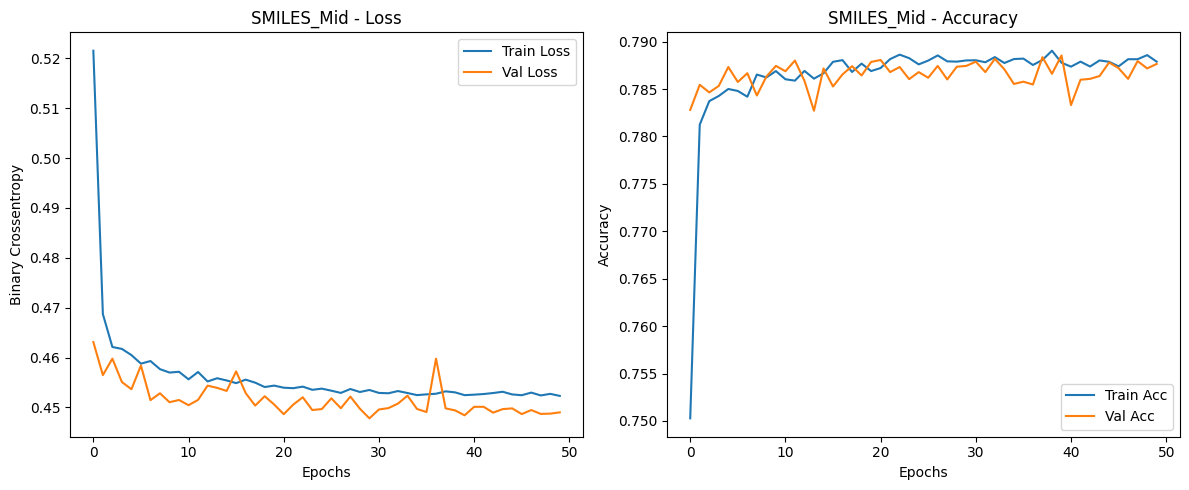

In [ ]:
plot_training_curves(history_mid, "SMILES_Mid")

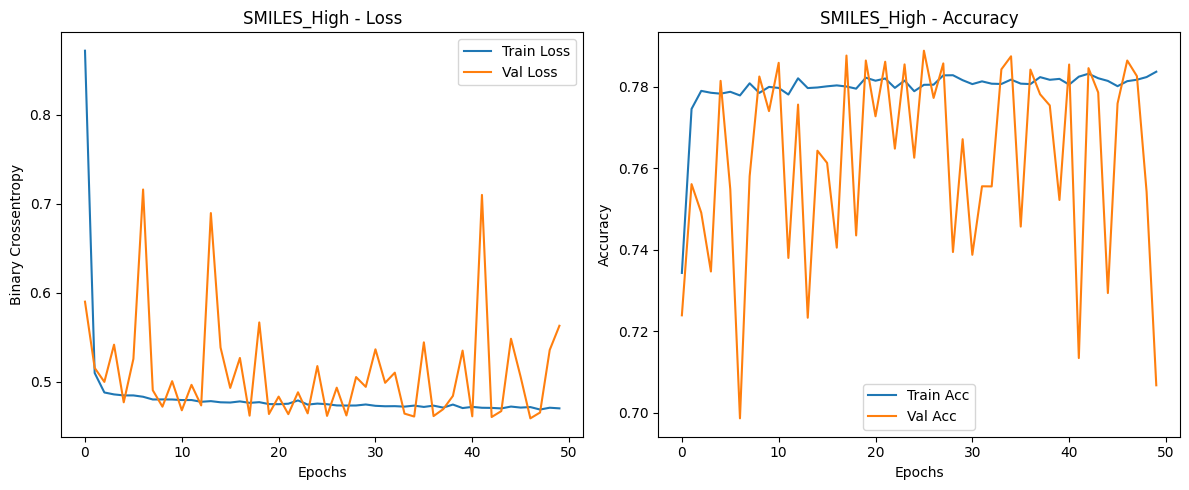

In [ ]:
plot_training_curves(history_high, "SMILES_High")

## best CNN 1D model (SM_MID)

- 50:50 Train-Test Split
- Tune Learning Rate (0.0005, 0.0001)
- Plot Learning Curve: Train on subsets of data (10%, 30%, 50%, 70%, 100%)

### Learning Curve (Train % vs AUC)


Training with 10% of the data

Training with 30% of the data

Training with 50% of the data

Training with 70% of the data

Training with 100% of the data


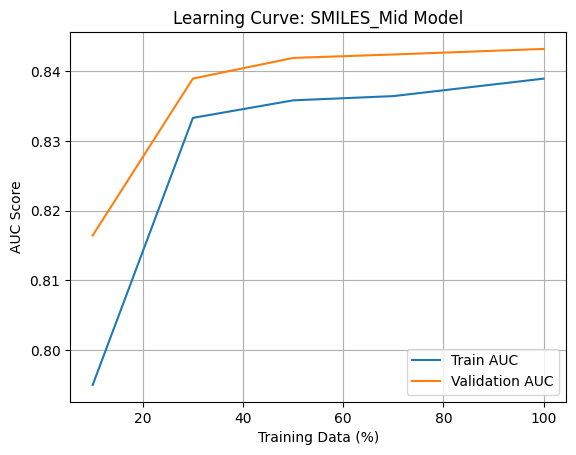

In [ ]:
train_sizes = [0.1, 0.3, 0.5, 0.7, 1.0]
train_auc_scores = []
val_auc_scores = []

for size in train_sizes:
    print(f"\nTraining with {int(size*100)}% of the data")

    if size < 1.0:
        X_sub, _, y_sub, _ = train_test_split(
            X_train_smiles, y_train_smiles, train_size=size, stratify=y_train_smiles, random_state=42
        )
    else:
        X_sub = X_train_smiles
        y_sub = y_train_smiles

    input_layer = Input(shape=(X_train_smiles.shape[1],))
    x = Embedding(input_dim=vocab_size, output_dim=32)(input_layer)
    x = Conv1D(64, kernel_size=5, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model_temp = Model(inputs=input_layer, outputs=output_layer)

    model_temp.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )

    history = model_temp.fit(
        X_sub, y_sub,
        epochs=10,
        batch_size=64,
        validation_data=(X_test_smiles, y_test_smiles),
        verbose=0
    )

    train_auc_scores.append(history.history['AUC'][-1])
    val_auc_scores.append(history.history['val_AUC'][-1])

# Plot the AUC learning curve
import matplotlib.pyplot as plt

plt.plot([int(s*100) for s in train_sizes], train_auc_scores, label='Train AUC')
plt.plot([int(s*100) for s in train_sizes], val_auc_scores, label='Validation AUC')
plt.xlabel('Training Data (%)')
plt.ylabel('AUC Score')
plt.title('Learning Curve: SMILES_Mid Model')
plt.legend()
plt.grid(True)
plt.show()

### For Learning Rate Tuning

In [ ]:
learning_rates = [0.01, 0.001, 0.0005, 0.0001]
train_auc_lr = []
val_auc_lr = []

for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")

    # Build the model
    input_layer = Input(shape=(X_train_smiles.shape[1],))
    x = Embedding(input_dim=vocab_size, output_dim=32)(input_layer)
    x = Conv1D(64, kernel_size=5, activation='relu')(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model_temp = Model(inputs=input_layer, outputs=output_layer)

    model_temp.compile(
        optimizer=Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )

    history = model_temp.fit(
        X_train_smiles, y_train_smiles,
        epochs=10,
        batch_size=64,
        validation_data=(X_test_smiles, y_test_smiles),
        verbose=0
    )

    train_auc_lr.append(history.history['AUC'][-1])
    val_auc_lr.append(history.history['val_AUC'][-1])


Training with learning rate = 0.01

Training with learning rate = 0.001

Training with learning rate = 0.0005

Training with learning rate = 0.0001


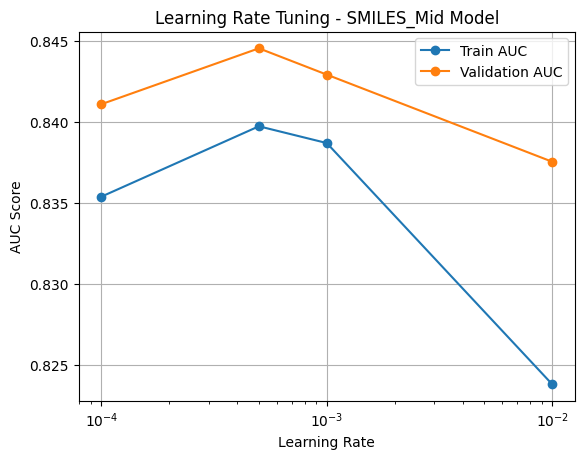

In [ ]:
plt.figure()
plt.plot(learning_rates, train_auc_lr, label='Train AUC', marker='o')
plt.plot(learning_rates, val_auc_lr, label='Validation AUC', marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('AUC Score')
plt.title('Learning Rate Tuning - SMILES_Mid Model')
plt.legend()
plt.grid(True)
plt.show()

### best configure model:

- SM-Mid
- Training with learning rate = 0.0005
- Training with 50% of the data
- 100 epoch

In [ ]:
# === 4. Split 50% train / 50% validation ===
X_train_smiles, X_val_smiles, y_train_smiles, y_val_smiles = train_test_split(
    padded_sequences, labels, test_size=0.5, stratify=labels, random_state=42
)

# === 5. Define model (SM-Mid architecture) ===
vocab_size = len(tokenizer.word_index) + 1
smiles_input = Input(shape=(MAXLEN,), name="SMILES_Input")
x_mid = Embedding(input_dim=vocab_size, output_dim=32)(smiles_input)
x_mid = Conv1D(64, kernel_size=5, activation='relu')(x_mid)
x_mid = GlobalMaxPooling1D()(x_mid)
x_mid = Dense(32, activation='relu')(x_mid)
x_mid = Dropout(0.3)(x_mid)
output_mid = Dense(1, activation='sigmoid')(x_mid)

bestcnnmodel = Model(inputs=smiles_input, outputs=output_mid, name="Best_CNN_Model")

# === 6. Compile ===
bestcnnmodel.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# === 7. Callbacks ===
early_stopping = EarlyStopping(monitor='val_AUC', patience=15, mode='max', restore_best_weights=True)
checkpoint = ModelCheckpoint('best_SM_Mid.h5', monitor='val_AUC', save_best_only=True, mode='max')

# === 8. Train ===
history = bestcnnmodel.fit(
    X_train_smiles, y_train_smiles,
    validation_data=(X_val_smiles, y_val_smiles),
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

# === Save Final Model ===
bestcnnmodel.save("Best-cnn-model.h5")

Epoch 1/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.6241 - accuracy: 0.6897 - loss: 0.6076

751/751 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - AUC: 0.6243 - accuracy: 0.6898 - loss: 0.6075 - val_AUC: 0.8148 - val_accuracy: 0.7648 - val_loss: 0.4933
Epoch 2/200
747/751 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8103 - accuracy: 0.7727 - loss: 0.4915

751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.8104 - accuracy: 0.7727 - loss: 0.4915 - val_AUC: 0.8371 - val_accuracy: 0.7839 - val_loss: 0.4609
Epoch 3/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8293 - accuracy: 0.7838 - loss: 0.4673

751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8293 - accuracy: 0.7838 - loss: 0.4673 - val_AUC: 0.8385 - val_accuracy: 0.7810 - val_loss: 0.4605
Epoch 4/200
747/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8324 - accuracy: 0.7844 - loss: 0.4648

751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8324 - accuracy: 0.7843 - loss: 0.4648 - val_AUC: 0.8408 - val_accuracy: 0.7847 - val_loss: 0.4712
Epoch 5/200
748/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8319 - accuracy: 0.7847 - loss: 0.4632

751/751 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.8319 - accuracy: 0.7847 - loss: 0.4632 - val_AUC: 0.8422 - val_accuracy: 0.7865 - val_loss: 0.4569
Epoch 6/200
735/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8389 - accuracy: 0.7876 - loss: 0.4567

751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8389 - accuracy: 0.7876 - loss: 0.4568 - val_AUC: 0.8427 - val_accuracy: 0.7848 - val_loss: 0.4552
Epoch 7/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - AUC: 0.8357 - accuracy: 0.7856 - loss: 0.4603 - val_AUC: 0.8425 - val_accuracy: 0.7822 - val_loss: 0.4598
Epoch 8/200
740/751 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - AUC: 0.8363 - accuracy: 0.7844 - loss: 0.4610

751/751 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - AUC: 0.8363 - accuracy: 0.7845 - loss: 0.4610 - val_AUC: 0.8439 - val_accuracy: 0.7836 - val_loss: 0.4545
Epoch 9/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8399 - accuracy: 0.7863 - loss: 0.4556 - val_AUC: 0.8431 - val_accuracy: 0.7858 - val_loss: 0.4548
Epoch 10/200
734/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8428 - accuracy: 0.7888 - loss: 0.4521

751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8427 - accuracy: 0.7888 - loss: 0.4522 - val_AUC: 0.8444 - val_accuracy: 0.7863 - val_loss: 0.4509
Epoch 11/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.8380 - accuracy: 0.7851 - loss: 0.4585 - val_AUC: 0.8439 - val_accuracy: 0.7863 - val_loss: 0.4546
Epoch 12/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8391 - accuracy: 0.7848 - loss: 0.4596

751/751 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.8391 - accuracy: 0.7848 - loss: 0.4596 - val_AUC: 0.8444 - val_accuracy: 0.7855 - val_loss: 0.4532
Epoch 13/200
746/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8429 - accuracy: 0.7895 - loss: 0.4515

751/751 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - AUC: 0.8429 - accuracy: 0.7894 - loss: 0.4515 - val_AUC: 0.8449 - val_accuracy: 0.7857 - val_loss: 0.4500
Epoch 14/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8396 - accuracy: 0.7860 - loss: 0.4565 - val_AUC: 0.8435 - val_accuracy: 0.7850 - val_loss: 0.4518
Epoch 15/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8389 - accuracy: 0.7904 - loss: 0.4551 - val_AUC: 0.8447 - val_accuracy: 0.7829 - val_loss: 0.4543
Epoch 16/200
746/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8461 - accuracy: 0.7865 - loss: 0.4491

751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8461 - accuracy: 0.7864 - loss: 0.4491 - val_AUC: 0.8453 - val_accuracy: 0.7851 - val_loss: 0.4523
Epoch 17/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8390 - accuracy: 0.7854 - loss: 0.4587 - val_AUC: 0.8443 - val_accuracy: 0.7843 - val_loss: 0.4540
Epoch 18/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8405 - accuracy: 0.7861 - loss: 0.4560 - val_AUC: 0.8446 - val_accuracy: 0.7857 - val_loss: 0.4552
Epoch 19/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8392 - accuracy: 0.7869 - loss: 0.4558 - val_AUC: 0.8444 - val_accuracy: 0.7860 - val_loss: 0.4500
Epoch 20/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8407 - accuracy: 0.7842 - loss: 0.4547 - val_AUC: 0.8440 - val_accuracy: 0.7885 - val_loss: 0.4519
Epoch 21/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8401 - accuracy: 0.7866 - loss: 0.4554 - val_AUC: 0.8449 - val_accuracy: 0.7881 - val_loss: 0.4492
Epoch 22/200
751/751 ━━━━━━━━━━━━━━━━━━━━

751/751 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8421 - accuracy: 0.7867 - loss: 0.4541 - val_AUC: 0.8454 - val_accuracy: 0.7875 - val_loss: 0.4515
Epoch 24/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8422 - accuracy: 0.7896 - loss: 0.4532 - val_AUC: 0.8444 - val_accuracy: 0.7879 - val_loss: 0.4501
Epoch 25/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8417 - accuracy: 0.7867 - loss: 0.4538 - val_AUC: 0.8444 - val_accuracy: 0.7874 - val_loss: 0.4518
Epoch 26/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8425 - accuracy: 0.7888 - loss: 0.4547 - val_AUC: 0.8446 - val_accuracy: 0.7882 - val_loss: 0.4500
Epoch 27/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8418 - accuracy: 0.7877 - loss: 0.4545 - val_AUC: 0.8453 - val_accuracy: 0.7849 - val_loss: 0.4517
Epoch 28/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8429 - accuracy: 0.7858 - loss: 0.4544 - val_AUC: 0.8449 - val_accuracy: 0.7883 - val_loss: 0.4501
Epoch 29/200
751/751 ━━━━━━━━━━━━━━━━━━━━

751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8462 - accuracy: 0.7877 - loss: 0.4495 - val_AUC: 0.8458 - val_accuracy: 0.7880 - val_loss: 0.4480
Epoch 34/200
738/751 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8439 - accuracy: 0.7863 - loss: 0.4528

751/751 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - AUC: 0.8439 - accuracy: 0.7863 - loss: 0.4528 - val_AUC: 0.8459 - val_accuracy: 0.7882 - val_loss: 0.4475
Epoch 35/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - AUC: 0.8429 - accuracy: 0.7884 - loss: 0.4523 - val_AUC: 0.8451 - val_accuracy: 0.7873 - val_loss: 0.4493
Epoch 36/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - AUC: 0.8432 - accuracy: 0.7902 - loss: 0.4518 - val_AUC: 0.8453 - val_accuracy: 0.7874 - val_loss: 0.4542
Epoch 37/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8422 - accuracy: 0.7863 - loss: 0.4551 - val_AUC: 0.8454 - val_accuracy: 0.7881 - val_loss: 0.4487
Epoch 38/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8419 - accuracy: 0.7859 - loss: 0.4545 - val_AUC: 0.8455 - val_accuracy: 0.7886 - val_loss: 0.4490
Epoch 39/200
751/751 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.8419 - accuracy: 0.7874 - loss: 0.4536 - val_AUC: 0.8453 - val_accuracy: 0.7888 - val_loss: 0.4494
Epoch 40/200
751/751 ━━━━━━━━━━━━━━━━━━━━

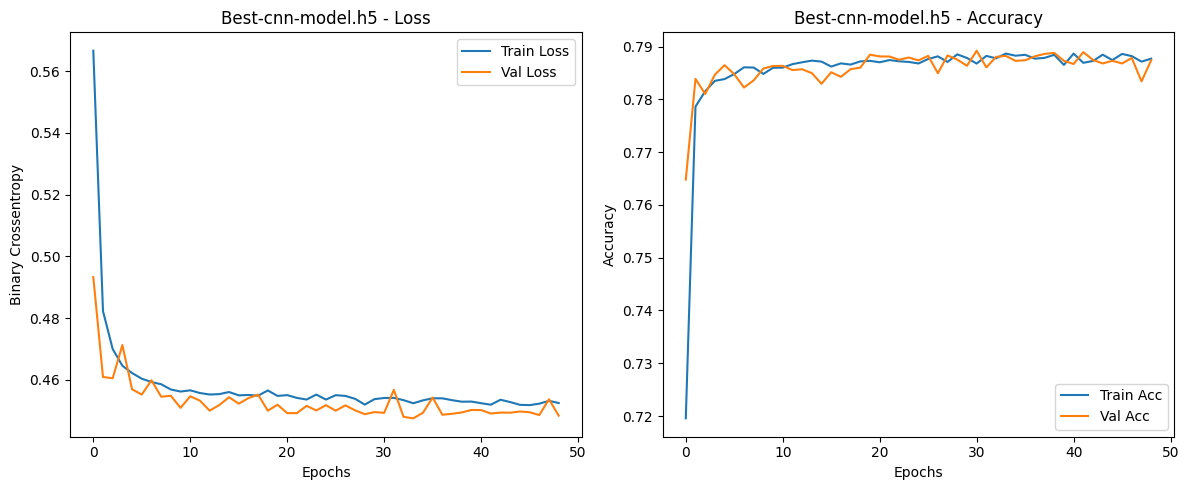

In [ ]:
plot_training_curves(history, "Best-cnn-model.h5")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# === 4. Split data (initial train/test) ===
X_train_smiles, X_test_smiles, y_train_smiles, y_test_smiles = train_test_split(
    padded_sequences, labels, test_size=0.35, stratify=labels, random_state=42
)

# === 5. Reduce training size to 50% of training set ===
X_train_half, _, y_train_half, _ = train_test_split(
    X_train_smiles, y_train_smiles, train_size=0.5, stratify=y_train_smiles, random_state=42
)

# === 6. Define model (SM-Mid architecture) ===
vocab_size = len(tokenizer.word_index) + 1
smiles_input = Input(shape=(MAXLEN,), name="SMILES_Input")
x_mid = Embedding(input_dim=vocab_size, output_dim=32)(smiles_input)
x_mid = Conv1D(64, kernel_size=5, activation='relu')(x_mid)
x_mid = GlobalMaxPooling1D()(x_mid)
x_mid = Dense(32, activation='relu')(x_mid)
x_mid = Dropout(0.3)(x_mid)
output_mid = Dense(1, activation='sigmoid')(x_mid)

reducingratecnnmodel = Model(inputs=smiles_input, outputs=output_mid, name="ReducingRate_CNN_Model")

# === 7. Compile ===
reducingratecnnmodel.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)

# === 8. Callbacks ===
early_stopping = EarlyStopping(monitor='val_AUC', patience=15, mode='max', restore_best_weights=True)
checkpoint = ModelCheckpoint('best_reducingratecnnmodel.h5', monitor='val_AUC', save_best_only=True, mode='max')

lr_scheduler = ReduceLROnPlateau(
    monitor='val_AUC',
    factor=0.5,             # Reduce LR by half
    patience=5,             # Wait 5 epochs without improvement
    verbose=1,
    mode='max',
    min_lr=1e-6             # Minimum learning rate
)

# === 9. Fit model ===
history = reducingratecnnmodel.fit(
    X_train_half, y_train_half,
    validation_data=(X_test_smiles, y_test_smiles),
    epochs=200,
    batch_size=64,
    callbacks=[early_stopping, checkpoint, lr_scheduler],
    verbose=1
)

# === Save Final Model ===
reducingratecnnmodel.save("reducingratecnnmodel.h5")

Epoch 1/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.5684 - accuracy: 0.6782 - loss: 0.6280

489/489 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - AUC: 0.5686 - accuracy: 0.6782 - loss: 0.6280 - val_AUC: 0.7756 - val_accuracy: 0.7538 - val_loss: 0.5315 - learning_rate: 5.0000e-04
Epoch 2/200
478/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7731 - accuracy: 0.7496 - loss: 0.5220

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.7736 - accuracy: 0.7499 - loss: 0.5217 - val_AUC: 0.8297 - val_accuracy: 0.7738 - val_loss: 0.4729 - learning_rate: 5.0000e-04
Epoch 3/200
486/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8143 - accuracy: 0.7764 - loss: 0.4839

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8144 - accuracy: 0.7764 - loss: 0.4839 - val_AUC: 0.8350 - val_accuracy: 0.7659 - val_loss: 0.4973 - learning_rate: 5.0000e-04
Epoch 4/200
482/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8245 - accuracy: 0.7784 - loss: 0.4752

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8245 - accuracy: 0.7784 - loss: 0.4751 - val_AUC: 0.8385 - val_accuracy: 0.7858 - val_loss: 0.4588 - learning_rate: 5.0000e-04
Epoch 5/200
488/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8293 - accuracy: 0.7795 - loss: 0.4683

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8293 - accuracy: 0.7795 - loss: 0.4683 - val_AUC: 0.8403 - val_accuracy: 0.7858 - val_loss: 0.4556 - learning_rate: 5.0000e-04
Epoch 6/200
484/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8377 - accuracy: 0.7868 - loss: 0.4567

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8376 - accuracy: 0.7867 - loss: 0.4568 - val_AUC: 0.8416 - val_accuracy: 0.7854 - val_loss: 0.4557 - learning_rate: 5.0000e-04
Epoch 7/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - AUC: 0.8337 - accuracy: 0.7857 - loss: 0.4635 - val_AUC: 0.8413 - val_accuracy: 0.7846 - val_loss: 0.4545 - learning_rate: 5.0000e-04
Epoch 8/200
483/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8351 - accuracy: 0.7842 - loss: 0.4591

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8351 - accuracy: 0.7842 - loss: 0.4591 - val_AUC: 0.8418 - val_accuracy: 0.7829 - val_loss: 0.4591 - learning_rate: 5.0000e-04
Epoch 9/200
478/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8262 - accuracy: 0.7755 - loss: 0.4707

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8263 - accuracy: 0.7756 - loss: 0.4705 - val_AUC: 0.8422 - val_accuracy: 0.7860 - val_loss: 0.4543 - learning_rate: 5.0000e-04
Epoch 10/200
483/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8358 - accuracy: 0.7831 - loss: 0.4613

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8358 - accuracy: 0.7831 - loss: 0.4613 - val_AUC: 0.8429 - val_accuracy: 0.7867 - val_loss: 0.4521 - learning_rate: 5.0000e-04
Epoch 11/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8351 - accuracy: 0.7818 - loss: 0.4605 - val_AUC: 0.8422 - val_accuracy: 0.7841 - val_loss: 0.4534 - learning_rate: 5.0000e-04
Epoch 12/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8388 - accuracy: 0.7866 - loss: 0.4580 - val_AUC: 0.8427 - val_accuracy: 0.7857 - val_loss: 0.4538 - learning_rate: 5.0000e-04
Epoch 13/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8356 - accuracy: 0.7866 - loss: 0.4596 - val_AUC: 0.8425 - val_accuracy: 0.7826 - val_loss: 0.4579 - learning_rate: 5.0000e-04
Epoch 14/200
487/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8311 - accuracy: 0.7817 - loss: 0.4649

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8312 - accuracy: 0.7817 - loss: 0.4649 - val_AUC: 0.8431 - val_accuracy: 0.7857 - val_loss: 0.4521 - learning_rate: 5.0000e-04
Epoch 15/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8374 - accuracy: 0.7840 - loss: 0.4568 - val_AUC: 0.8428 - val_accuracy: 0.7818 - val_loss: 0.4588 - learning_rate: 5.0000e-04
Epoch 16/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8318 - accuracy: 0.7815 - loss: 0.4668 - val_AUC: 0.8427 - val_accuracy: 0.7845 - val_loss: 0.4524 - learning_rate: 5.0000e-04
Epoch 17/200
473/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8373 - accuracy: 0.7887 - loss: 0.4589

489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8372 - accuracy: 0.7886 - loss: 0.4589 - val_AUC: 0.8433 - val_accuracy: 0.7859 - val_loss: 0.4536 - learning_rate: 5.0000e-04
Epoch 18/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8370 - accuracy: 0.7827 - loss: 0.4616 - val_AUC: 0.8431 - val_accuracy: 0.7858 - val_loss: 0.4524 - learning_rate: 5.0000e-04
Epoch 19/200
483/489 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8347 - accuracy: 0.7849 - loss: 0.4617

489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.8347 - accuracy: 0.7849 - loss: 0.4617 - val_AUC: 0.8437 - val_accuracy: 0.7868 - val_loss: 0.4530 - learning_rate: 5.0000e-04
Epoch 20/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8388 - accuracy: 0.7858 - loss: 0.4572 - val_AUC: 0.8431 - val_accuracy: 0.7861 - val_loss: 0.4555 - learning_rate: 5.0000e-04
Epoch 21/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8361 - accuracy: 0.7828 - loss: 0.4606 - val_AUC: 0.8424 - val_accuracy: 0.7841 - val_loss: 0.4526 - learning_rate: 5.0000e-04
Epoch 22/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8375 - accuracy: 0.7835 - loss: 0.4582

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8375 - accuracy: 0.7835 - loss: 0.4582 - val_AUC: 0.8438 - val_accuracy: 0.7865 - val_loss: 0.4517 - learning_rate: 5.0000e-04
Epoch 23/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8359 - accuracy: 0.7823 - loss: 0.4592 - val_AUC: 0.8419 - val_accuracy: 0.7846 - val_loss: 0.4534 - learning_rate: 5.0000e-04
Epoch 24/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8385 - accuracy: 0.7858 - loss: 0.4564
Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8385 - accuracy: 0.7858 - loss: 0.4564 - val_AUC: 0.8431 - val_accuracy: 0.7855 - val_loss: 0.4541 - learning_rate: 5.0000e-04
Epoch 25/200
479/489 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8414 - accuracy: 0.7845 - loss: 0.4556

489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - AUC: 0.8414 - accuracy: 0.7845 - loss: 0.4555 - val_AUC: 0.8442 - val_accuracy: 0.7867 - val_loss: 0.4509 - learning_rate: 2.5000e-04
Epoch 26/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8404 - accuracy: 0.7852 - loss: 0.4537 - val_AUC: 0.8440 - val_accuracy: 0.7869 - val_loss: 0.4517 - learning_rate: 2.5000e-04
Epoch 27/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8419 - accuracy: 0.7865 - loss: 0.4534 - val_AUC: 0.8438 - val_accuracy: 0.7868 - val_loss: 0.4512 - learning_rate: 2.5000e-04
Epoch 28/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8393 - accuracy: 0.7865 - loss: 0.4561 - val_AUC: 0.8438 - val_accuracy: 0.7858 - val_loss: 0.4515 - learning_rate: 2.5000e-04
Epoch 29/200
486/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8412 - accuracy: 0.7883 - loss: 0.4523

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8412 - accuracy: 0.7882 - loss: 0.4523 - val_AUC: 0.8442 - val_accuracy: 0.7868 - val_loss: 0.4509 - learning_rate: 2.5000e-04
Epoch 30/200
480/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8420 - accuracy: 0.7904 - loss: 0.4496
Epoch 30: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8420 - accuracy: 0.7903 - loss: 0.4497 - val_AUC: 0.8440 - val_accuracy: 0.7854 - val_loss: 0.4549 - learning_rate: 2.5000e-04
Epoch 31/200
486/489 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8403 - accuracy: 0.7881 - loss: 0.4524

489/489 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - AUC: 0.8403 - accuracy: 0.7880 - loss: 0.4524 - val_AUC: 0.8445 - val_accuracy: 0.7872 - val_loss: 0.4512 - learning_rate: 1.2500e-04
Epoch 32/200
484/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8425 - accuracy: 0.7875 - loss: 0.4511

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8425 - accuracy: 0.7875 - loss: 0.4511 - val_AUC: 0.8445 - val_accuracy: 0.7870 - val_loss: 0.4504 - learning_rate: 1.2500e-04
Epoch 33/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8430 - accuracy: 0.7885 - loss: 0.4500 - val_AUC: 0.8444 - val_accuracy: 0.7865 - val_loss: 0.4508 - learning_rate: 1.2500e-04
Epoch 34/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8399 - accuracy: 0.7890 - loss: 0.4529 - val_AUC: 0.8441 - val_accuracy: 0.7872 - val_loss: 0.4510 - learning_rate: 1.2500e-04
Epoch 35/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - AUC: 0.8447 - accuracy: 0.7922 - loss: 0.4493 - val_AUC: 0.8443 - val_accuracy: 0.7868 - val_loss: 0.4507 - learning_rate: 1.2500e-04
Epoch 36/200
481/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8424 - accuracy: 0.7881 - loss: 0.4528
Epoch 36: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8424 - accuracy: 0.7881 -

489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - AUC: 0.8444 - accuracy: 0.7877 - loss: 0.4485 - val_AUC: 0.8445 - val_accuracy: 0.7862 - val_loss: 0.4503 - learning_rate: 6.2500e-05
Epoch 40/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8453 - accuracy: 0.7901 - loss: 0.4492 - val_AUC: 0.8445 - val_accuracy: 0.7862 - val_loss: 0.4509 - learning_rate: 6.2500e-05
Epoch 41/200
475/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8431 - accuracy: 0.7859 - loss: 0.4547
Epoch 41: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8431 - accuracy: 0.7860 - loss: 0.4546 - val_AUC: 0.8444 - val_accuracy: 0.7862 - val_loss: 0.4523 - learning_rate: 6.2500e-05
Epoch 42/200
486/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8358 - accuracy: 0.7837 - loss: 0.4575

489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8359 - accuracy: 0.7837 - loss: 0.4575 - val_AUC: 0.8446 - val_accuracy: 0.7866 - val_loss: 0.4503 - learning_rate: 3.1250e-05
Epoch 43/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8419 - accuracy: 0.7870 - loss: 0.4508 - val_AUC: 0.8445 - val_accuracy: 0.7869 - val_loss: 0.4505 - learning_rate: 3.1250e-05
Epoch 44/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8430 - accuracy: 0.7896 - loss: 0.4492 - val_AUC: 0.8445 - val_accuracy: 0.7869 - val_loss: 0.4503 - learning_rate: 3.1250e-05
Epoch 45/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8417 - accuracy: 0.7893 - loss: 0.4505 - val_AUC: 0.8445 - val_accuracy: 0.7873 - val_loss: 0.4504 - learning_rate: 3.1250e-05
Epoch 46/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.8411 - accuracy: 0.7894 - loss: 0.4514 - val_AUC: 0.8446 - val_accuracy: 0.7873 - val_loss: 0.4503 - learning_rate: 3.1250e-05
Epoch 47/200
485/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.

489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8473 - accuracy: 0.7906 - loss: 0.4473 - val_AUC: 0.8446 - val_accuracy: 0.7863 - val_loss: 0.4504 - learning_rate: 7.8125e-06
Epoch 54/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8455 - accuracy: 0.7913 - loss: 0.4469 - val_AUC: 0.8446 - val_accuracy: 0.7863 - val_loss: 0.4503 - learning_rate: 7.8125e-06
Epoch 55/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.8452 - accuracy: 0.7917 - loss: 0.4464 - val_AUC: 0.8446 - val_accuracy: 0.7863 - val_loss: 0.4503 - learning_rate: 7.8125e-06
Epoch 56/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.8389 - accuracy: 0.7860 - loss: 0.4559 - val_AUC: 0.8446 - val_accuracy: 0.7863 - val_loss: 0.4504 - learning_rate: 7.8125e-06
Epoch 57/200
482/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8463 - accuracy: 0.7925 - loss: 0.4459


Epoch 57: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8463 - accuracy: 0.7924 - loss: 0.4460 - val_AUC: 0.8447 - val_accuracy: 0.7863 - val_loss: 0.4504 - learning_rate: 7.8125e-06
Epoch 58/200
472/489 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8421 - accuracy: 0.7886 - loss: 0.4508

489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.8421 - accuracy: 0.7887 - loss: 0.4508 - val_AUC: 0.8447 - val_accuracy: 0.7863 - val_loss: 0.4504 - learning_rate: 3.9063e-06
Epoch 59/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - AUC: 0.8413 - accuracy: 0.7881 - loss: 0.4531 - val_AUC: 0.8446 - val_accuracy: 0.7863 - val_loss: 0.4504 - learning_rate: 3.9063e-06
Epoch 60/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - AUC: 0.8452 - accuracy: 0.7906 - loss: 0.4466 - val_AUC: 0.8446 - val_accuracy: 0.7863 - val_loss: 0.4503 - learning_rate: 3.9063e-06
Epoch 61/200
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - AUC: 0.8455 - accuracy: 0.7920 - loss: 0.4473 - val_AUC: 0.8447 - val_accuracy: 0.7863 - val_loss: 0.4504 - learning_rate: 3.9063e-06
Epoch 62/200
482/489 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8407 - accuracy: 0.7901 - loss: 0.4528
Epoch 62: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
489/489 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - AUC: 0.8408 - accuracy: 0.7901

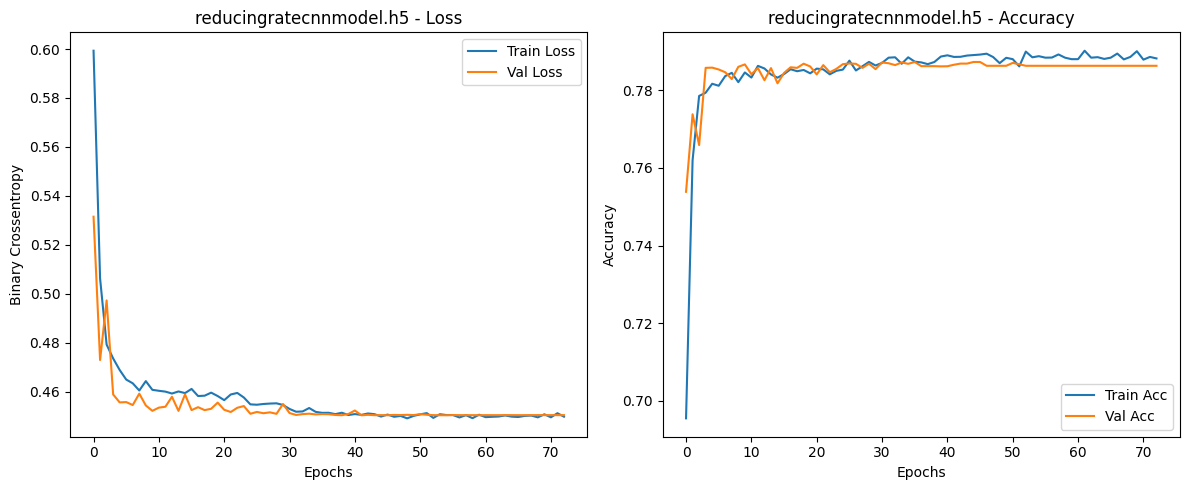

In [ ]:
plot_training_curves(history, "reducingratecnnmodel.h5")

# Compare my model vs pretrained model

## Pretrain model

source:https://metatext.io/models/seyonec-ChemBERTa-zinc-base-v1

In [ ]:
!pip install transformers datasets

In [ ]:
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 124.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.3
    Uninstalling transformers-4.52.3:
      Successfully uninstalled transformers-4.52.3


In [ ]:
# Import libraries
import pandas as pd
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# for just pretrain model
merged_df = merged.copy()

In [ ]:
# Train/validation split
merged_df = merged_df.dropna(subset=["SMILES", "sensitivity_label"])
merged_df["sensitivity_label"] = merged_df["sensitivity_label"].astype(int)

# Convert to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(merged_df[["SMILES", "sensitivity_label"]])

# Load tokenizer
tokenizer = RobertaTokenizer.from_pretrained("seyonec/ChemBERTa-zinc-base-v1")

# Tokenize function
def tokenize_function(example):
    return tokenizer(example["SMILES"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization
hf_dataset = hf_dataset.map(tokenize_function, batched=True)

# Rename label column for Trainer
hf_dataset = hf_dataset.rename_column("sensitivity_label", "labels")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/166 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/9.43k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/3.21k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Map:   0%|          | 0/96103 [00:00<?, ? examples/s]

In [ ]:
# Use the built-in method of the dataset object
split = hf_dataset.train_test_split(test_size=0.3, seed=42)

In [ ]:
from torch.utils.data import Dataset as TorchDataset
import torch

# Convert to pandas first
train_df = split["train"].to_pandas()
val_df = split["test"].to_pandas()

# Custom PyTorch dataset
class ChemBERTaDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.input_ids = df["input_ids"].tolist()
        self.attention_mask = df["attention_mask"].tolist()
        self.labels = df["labels"].tolist()

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "input_ids": torch.tensor(self.input_ids[idx], dtype=torch.long),
            "attention_mask": torch.tensor(self.attention_mask[idx], dtype=torch.long),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Use clean PyTorch datasets
train_ds = ChemBERTaDataset(train_df)
val_ds = ChemBERTaDataset(val_df)

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("seyonec/ChemBERTa-zinc-base-v1", num_labels=2)

pytorch_model.bin:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/ChemBERTa-zinc-base-v1 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./chemberta_finetuned",
    do_train=True,
    do_eval=True,
    logging_dir="./logs",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    num_train_epochs=3,
)

In [ ]:
# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
)

model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

In [ ]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kritsada8774 (kritsada8774-assumption-university-of-thailand) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.518300
1000,0.479100
1500,0.468000
2000,0.462200
2500,0.457400
3000,0.452600
3500,0.456200
4000,0.455300
4500,0.453300
5000,0.448600


TrainOutput(global_step=6309, training_loss=0.46199991707190374, metrics={'train_runtime': 931.1346, 'train_samples_per_second': 216.742, 'train_steps_per_second': 6.776, 'total_flos': 6683510131789824.0, 'train_loss': 0.46199991707190374, 'epoch': 3.0})

In [ ]:
# Evaluate performance
metrics = trainer.evaluate()
print("Validation metrics:", metrics)

Validation metrics: {'eval_loss': 0.4486234784126282, 'eval_runtime': 43.8264, 'eval_samples_per_second': 657.846, 'eval_steps_per_second': 10.291, 'epoch': 3.0}


In [ ]:
# Save model
model.save_pretrained("/content/chemberta_finetuned")
tokenizer.save_pretrained("/content/chemberta_finetuned")

('/content/chemberta_finetuned/tokenizer_config.json',
 '/content/chemberta_finetuned/special_tokens_map.json',
 '/content/chemberta_finetuned/vocab.json',
 '/content/chemberta_finetuned/merges.txt',
 '/content/chemberta_finetuned/added_tokens.json')

In [ ]:
drive_model_path =  '/content/drive/MyDrive/VISTEC-dataset/external_datasets/'

In [ ]:
model.save_pretrained("chemberta_finetuned"+drive_model_path)
tokenizer.save_pretrained("chemberta_finetuned"+drive_model_path)

('chemberta_finetuned/content/drive/MyDrive/VISTEC-dataset/external_datasets/tokenizer_config.json',
 'chemberta_finetuned/content/drive/MyDrive/VISTEC-dataset/external_datasets/special_tokens_map.json',
 'chemberta_finetuned/content/drive/MyDrive/VISTEC-dataset/external_datasets/vocab.json',
 'chemberta_finetuned/content/drive/MyDrive/VISTEC-dataset/external_datasets/merges.txt',
 'chemberta_finetuned/content/drive/MyDrive/VISTEC-dataset/external_datasets/added_tokens.json')

## External datasets

https://ctd2-data.nci.nih.gov/Public/Broad/CTRPv2.0_2015_ctd2_ExpandedDataset/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Flat files
manifest = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/external_datasets/MANIFEST.txt')
COLUMNS = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/external_datasets/v20._COLUMNS.txt', sep='\t', engine='python')
README = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/external_datasets/v20._README.txt', sep='\t', engine='python')
curves_post_qc = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/external_datasets/v20.data.curves_post_qc.txt', sep='\t', engine='python')
per_compound = pd.read_csv('/content/drive/MyDrive/VISTEC-dataset/external_datasets/v20.meta.per_compound.txt', sep='\t', engine='python')

In [ ]:
# Print the heads of all DataFrames
print("Manifest Head:\n", manifest.head())
print("\nCOLUMNS Head:\n", COLUMNS.head())
print("\nREADME Head:\n", README.head())
print("\nCurves Post QC Head:\n", curves_post_qc.head())
print("\nPer Compound Head:\n", per_compound.head())

Manifest Head:
   8b4d0bb9bf5ca2535caebe08955fe69d *CTRPv2.0._COLUMNS.xlsx
0  f773101f76fa8652da2e853ff4ad6d0e *CTRPv2.0._IN...      
1  52b0eb58acdc4eacb918b8c96228b7a5 *CTRPv2.0._RE...      
2  f59d9e5b9c61f414d3c6648624393b15 *v20._COLUMNS...      
3  5ea204aabdc200ae5a6bf4be9507266c *v20._README.txt      
4  ec0a9cd3a3628e6e19091117e7f84fc8 *v20.data.cur...      

COLUMNS Head:
                  DATA_FILENAME     COLUMN_HEADER  \
0  v20.data.curves_post_qc.txt     experiment_id   
1  v20.data.curves_post_qc.txt      conc_pts_fit   
2  v20.data.curves_post_qc.txt     fit_num_param   
3  v20.data.curves_post_qc.txt  p1_conf_int_high   
4  v20.data.curves_post_qc.txt   p1_conf_int_low   

                                  COLUMN_DESCRIPTION  
0  serial number for experiment performed during ...  
1  number of concentration-response points partic...  
2             number of free parameters in curve fit  
3  upper bound of confidence interval (95%) for c...  
4  lower bound of confiden

### check are they the same dataset ?

In [ ]:
drug_info.columns = drug_info.columns.str.strip()
per_compound.columns = per_compound.columns.str.strip()

# Compare SMILES sets
smiles_set_1 = set(drug_info['SMILES'].dropna().unique())
smiles_set_2 = set(per_compound['cpd_smiles'].dropna().unique())

# Intersect to find overlap
common_smiles = smiles_set_1 & smiles_set_2
print("common_smiles = smiles_set_1 & smiles_set_2")
print(f"Total in drug_info: {len(smiles_set_1)}")
print(f"Total in per_compound: {len(smiles_set_2)}")
print(f"Number of overlapping SMILES: {len(common_smiles)}")

# example overlaps
print("\nExample overlapping SMILES:")
for s in list(common_smiles)[:5]:
    print(s)

common_smiles = smiles_set_1 & smiles_set_2
Total in drug_info: 228
Total in per_compound: 545
Number of overlapping SMILES: 1

Example overlapping SMILES:
CCC(=O)OCN1C(=O)C=CC1=O


### preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Filter curves with valid EC50 (apparent_ec50_umol > 0)
curves_filtered = curves_post_qc[curves_post_qc['apparent_ec50_umol'].notna() & (curves_post_qc['apparent_ec50_umol'] > 0)]

# Create binary sensitivity label (like GDSC: log(IC50) <= 1.5)
curves_filtered['log_ec50'] = np.log(curves_filtered['apparent_ec50_umol'])
curves_filtered['sensitivity_label'] = (curves_filtered['log_ec50'] <= 1.5).astype(int)

# Merge with compound information on `master_cpd_id`
external_merged = pd.merge(
    curves_filtered,
    per_compound[['master_cpd_id', 'cpd_name', 'cpd_smiles']],
    on='master_cpd_id',
    how='left'
)

# Clean SMILES and drop rows without SMILES
external_merged = external_merged.dropna(subset=['cpd_smiles'])

# Summary
summary = {
    "original_curve_shape": curves_post_qc.shape,
    "filtered_curve_shape": curves_filtered.shape,
    "final_merged_shape": external_merged.shape,
    "num_unique_compounds": external_merged['cpd_name'].nunique(),
    "sensitivity_label_counts": external_merged['sensitivity_label'].value_counts().to_dict(),
}

<ipython-input-8-5422f5bbfa6d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curves_filtered['log_ec50'] = np.log(curves_filtered['apparent_ec50_umol'])
<ipython-input-8-5422f5bbfa6d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curves_filtered['sensitivity_label'] = (curves_filtered['log_ec50'] <= 1.5).astype(int)


In [ ]:
# Size and structure
print("GDSC shape:", merged.shape)
print("CTRP shape:", external_merged.shape)

# Unique compounds
gdsc_smiles = set(merged['SMILES'].dropna().unique())
ctrp_smiles = set(external_merged['cpd_smiles'].dropna().unique())
overlapping_smiles = gdsc_smiles & ctrp_smiles

print("\n Unique GDSC drugs:", len(gdsc_smiles))
print("Unique CTRP drugs:", len(ctrp_smiles))
print("Overlapping drugs:", len(overlapping_smiles))

# Sensitivity label distribution
print("\n GDSC label counts:\n", merged['sensitivity_label'].value_counts())
print("\n CTRP label counts:\n", external_merged['sensitivity_label'].value_counts())

GDSC shape: (96103, 12)
CTRP shape: (383857, 21)

 Unique GDSC drugs: 227
Unique CTRP drugs: 545
Overlapping drugs: 1

 GDSC label counts:
 sensitivity_label
1    64413
0    31690
Name: count, dtype: int64

 CTRP label counts:
 sensitivity_label
1    200757
0    183100
Name: count, dtype: int64


## Load model & Predict the external dataset:

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Pretrain model (chemberta):

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

model_path = "/content/drive/MyDrive/VISTEC-dataset/chemberta_finetuned_model"

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained(model_path)
chemberta_model = RobertaForSequenceClassification.from_pretrained(model_path)

In [ ]:
from torch.utils.data import Dataset

class SMILESDataset(Dataset):
    def __init__(self, smiles_list, labels, tokenizer, max_length=128):
        self.smiles_list = smiles_list
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.smiles_list)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.smiles_list[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        item = {key: val.squeeze() for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

# Prepare dataset
external_dataset = SMILESDataset(
    smiles_list=external_merged['cpd_smiles'].tolist(),
    labels=external_merged['sensitivity_label'].tolist(),
    tokenizer=tokenizer
)

In [ ]:
from transformers import Trainer, TrainingArguments

# Create dummy training arguments for evaluation
dummy_args = TrainingArguments(
    output_dir="./dummy",
    per_device_eval_batch_size=64,
)

# Create Trainer and evaluate
trainer = Trainer(model=chemberta_model, args=dummy_args)
chemberta_pred = trainer.predict(external_dataset)

# Get predictions and labels
chemberta_y_true = chemberta_pred.label_ids
chemberta_y_pred = chemberta_pred.predictions.argmax(axis=1)

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kritsada8774 (kritsada8774-assumption-university-of-thailand) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


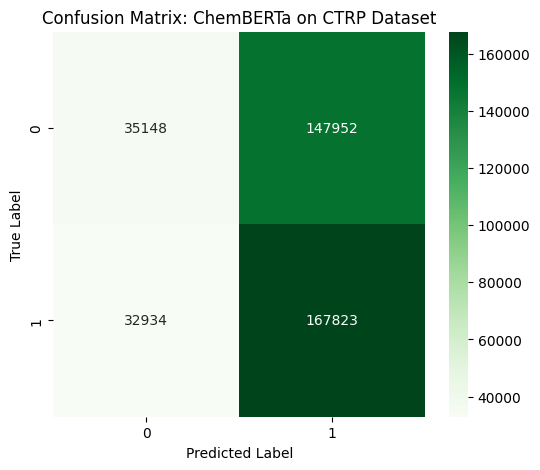

ChemBERTa Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.19      0.28    183100
           1       0.53      0.84      0.65    200757

    accuracy                           0.53    383857
   macro avg       0.52      0.51      0.46    383857
weighted avg       0.52      0.53      0.47    383857



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm_chemberta = confusion_matrix(chemberta_y_true, chemberta_y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_chemberta, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: ChemBERTa on CTRP Dataset')
plt.show()

# Detailed metrics
print("ChemBERTa Classification Report:")
print(classification_report(chemberta_y_true, chemberta_y_pred))


### CNN model:

In [ ]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 40.6 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import load_model
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

# Model path
cnn_model_path = '/content/drive/MyDrive/VISTEC-dataset/model/CNN/best_SM_Mid.h5'
cnn_model = load_model(cnn_model_path)

# Show summary
cnn_model.summary()

Model: "Best_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ SMILES_Input (InputLayer)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_6 (Embedding)         │ (None, 100, 32)        │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 96, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,411 (52.39 KB)

 Trainable params: 13,409 (52.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

encoding character-level SMILES input

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Rebuild the same tokenizer from training
smiles_train = merged['SMILES'].astype(str).tolist()
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(smiles_train)

In [ ]:
external_smiles = external_merged['cpd_smiles'].astype(str).tolist()
external_sequences = tokenizer.texts_to_sequences(external_smiles)
MAXLEN = 100  # same as during training
external_padded = pad_sequences(external_sequences, maxlen=MAXLEN, padding='post', truncating='post')

external_labels = external_merged['sensitivity_label'].values

In [ ]:
y_pred = cnn_model.predict(external_padded)
y_pred_binary = (y_pred.flatten() >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("CNN Evaluation on CTRP:")
print(confusion_matrix(external_labels, y_pred_binary))
print(classification_report(external_labels, y_pred_binary))

11996/11996 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
CNN Evaluation on CTRP:
[[ 43757 139343]
 [ 35819 164938]]
              precision    recall  f1-score   support

           0       0.55      0.24      0.33    183100
           1       0.54      0.82      0.65    200757

    accuracy                           0.54    383857
   macro avg       0.55      0.53      0.49    383857
weighted avg       0.55      0.54      0.50    383857



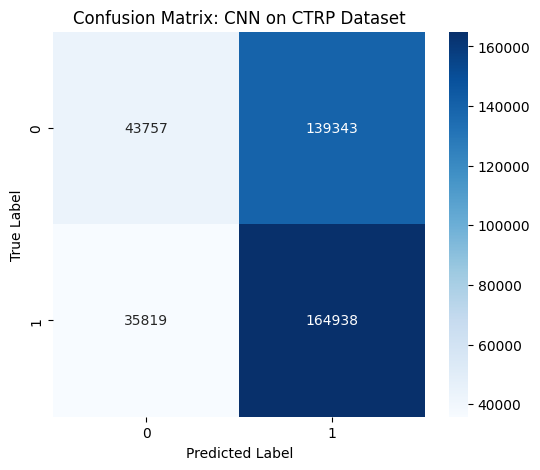

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(external_labels, y_pred_binary)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: CNN on CTRP Dataset')
plt.show()

# SHAP on CNN model

run external then this shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model

# Model path
cnn_model_path = '/content/drive/MyDrive/VISTEC-dataset/model/CNN/best_SM_Mid.h5'
cnn_model = load_model(cnn_model_path)

# Show summary
cnn_model.summary()

Model: "Best_CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ SMILES_Input (InputLayer)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_6 (Embedding)         │ (None, 100, 32)        │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 96, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,411 (52.39 KB)

 Trainable params: 13,409 (52.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Reconstruct Tokenizer and Preprocess External SMILES

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer based on training data
smiles_train = merged['SMILES'].astype(str).tolist()
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(smiles_train)

# Tokenize and pad external SMILES
external_smiles = external_merged['cpd_smiles'].astype(str).tolist()
external_sequences = tokenizer.texts_to_sequences(external_smiles)
MAXLEN = 100  # or whatever max length was used during training
external_padded = pad_sequences(external_sequences, maxlen=MAXLEN, padding='post', truncating='post')


In [ ]:
print(cnn_model.input.name)   # e.g., "SMILES_Input:0"

SMILES_Input


In [ ]:
input_name = cnn_model.input.name.split(':')[0]
print("Model expects input named:", input_name)

Model expects input named: SMILES_Input


In [ ]:
import shap
import numpy as np

# Select a small sample (smaller = faster)
X_background = external_padded[:20]  # background for SHAP
X_sample = external_padded[20:40]    # data to explain

# Define a prediction wrapper
f = lambda x: cnn_model.predict(x)

# Use KernelExplainer
explainer = shap.KernelExplainer(f, X_background)

# Compute SHAP values
shap_values = explainer.shap_values(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1405/1405 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [ ]:
print(X_sample.shape)
print(np.array(shap_values).shape)

(20, 100)
(20, 100, 1)


<ipython-input-37-54ce86d44743>:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


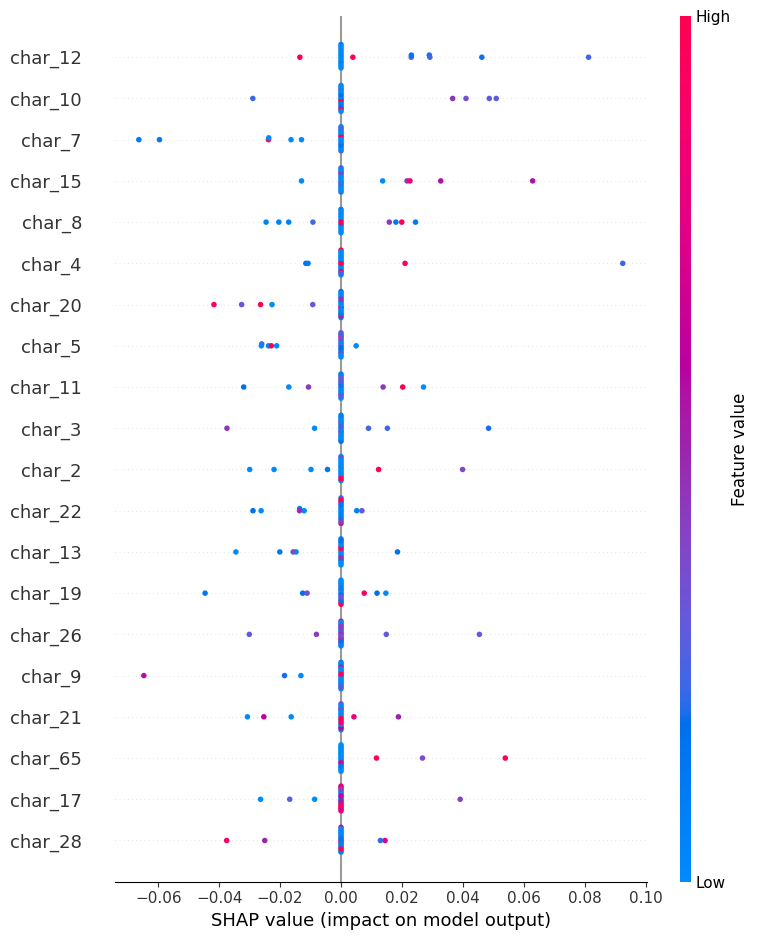

In [ ]:
shap_values_to_plot = np.squeeze(shap_values)  # shape becomes (20, 100)

shap.summary_plot(
    shap_values_to_plot,
    X_sample,
    feature_names=[f'char_{i}' for i in range(X_sample.shape[1])]
)


In [ ]:
# Reverse tokenizer: index → character
index_to_char = {v: k for k, v in tokenizer.word_index.items()}
index_to_char[0] = '[PAD]'

In [ ]:
# top rank char
top_char_positions = [12, 10, 7, 15, 8, 4, 20, 5, 11, 3, 2, 22, 13, 19, 26, 9, 21, 65, 17, 28]

In [ ]:
# Store results
char_summary = []

for pos in top_char_positions:
    char_indices = X_sample[:, pos]  # column for that position
    tokens = [index_to_char.get(idx, '?') for idx in char_indices]
    most_common_char, count = Counter(tokens).most_common(1)[0]
    char_summary.append((f"char_{pos}", most_common_char, count, len(tokens)))

# Show results
print("Position\tMost Common Char\tCount\tSample Size")
for row in char_summary:
    print(f"{row[0]:<10}\t{row[1]:<17}\t{row[2]:<5}\t{row[3]}")

Position	Most Common Char	Count	Sample Size
char_12   	c                	8    	20
char_10   	c                	6    	20
char_7    	c                	11   	20
char_15   	c                	9    	20
char_8    	c                	8    	20
char_4    	c                	11   	20
char_20   	c                	7    	20
char_5    	c                	9    	20
char_11   	c                	6    	20
char_3    	c                	8    	20
char_2    	c                	13   	20
char_22   	c                	7    	20
char_13   	c                	10   	20
char_19   	c                	7    	20
char_26   	[PAD]            	3    	20
char_9    	c                	9    	20
char_21   	c                	8    	20
char_65   	[PAD]            	14   	20
char_17   	c                	7    	20
char_28   	c                	5    	20


In [ ]:
from collections import defaultdict
import numpy as np

# Squeeze SHAP values if needed
shap_values_2d = np.squeeze(shap_values)  # shape: (N, 100)
X_chars = [[index_to_char.get(idx, '?') for idx in row] for row in X_sample]  # (N, 100)

# Accumulate SHAP values by character
char_shap_sum = defaultdict(float)
char_count = defaultdict(int)

for row_chars, row_shap in zip(X_chars, shap_values_2d):
    for char, shap_val in zip(row_chars, row_shap):
        if char == '[PAD]':
            continue  # skip padding
        char_shap_sum[char] += shap_val
        char_count[char] += 1

# Compute average SHAP value per character
char_shap_avg = {
    char: char_shap_sum[char] / char_count[char]
    for char in char_shap_sum
}

# Sort and display
sorted_shap = sorted(char_shap_avg.items(), key=lambda x: abs(x[1]), reverse=True)
print("Character\tAvg SHAP impact")
for char, val in sorted_shap:
    print(f"{char:<10}\t{val:.5f}")


Character	Avg SHAP impact
5         	0.04041
s         	-0.03628
p         	-0.02287
o         	0.00951
l         	-0.00880
n         	0.00394
[         	0.00390
=         	-0.00302
3         	0.00291
4         	0.00241
)         	0.00121
(         	-0.00113
-         	0.00097
2         	-0.00089
c         	-0.00069
]         	-0.00043
1         	0.00042
h         	-0.00031


let's incrase background sample size of 20 (X_background[:20]) -> 50

In [ ]:
# Select a larger SHAP background sample
X_background = external_padded[:50]     # 50 samples for background
X_sample = external_padded[50:70]       # 20 samples to explain

# Define prediction wrapper
f = lambda x: cnn_model.predict(x)

# Run SHAP with KernelExplainer
explainer = shap.KernelExplainer(f, X_background)
shap_values = explainer.shap_values(X_sample)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


  0%|          | 0/20 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
3513/3513 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

<ipython-input-50-6d316f982be3>:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


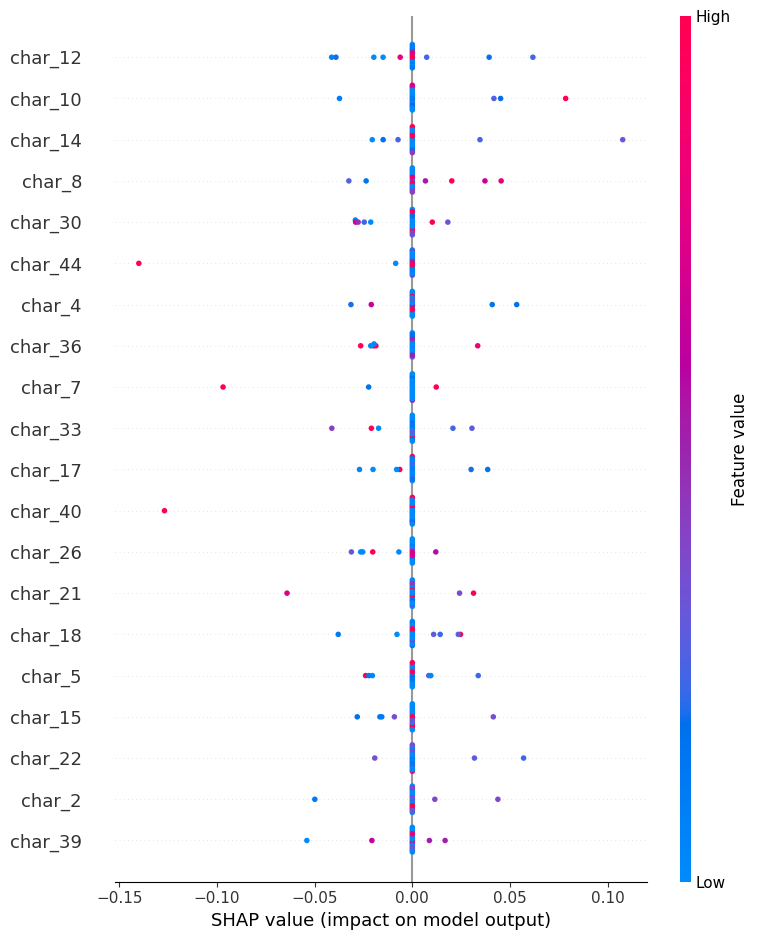

In [ ]:
# Plot SHAP summary
shap_values_to_plot = np.squeeze(shap_values)
shap.summary_plot(
    shap_values_to_plot,
    X_sample,
    feature_names=[f'char_{i}' for i in range(X_sample.shape[1])]
)

In [ ]:
# top rank char
top_char_positions = [2, 4, 5, 7, 8, 10, 12, 14, 15, 17, 18, 21, 22, 26, 30, 33, 36, 39, 40, 44]

In [ ]:
# Store results
char_summary = []

for pos in top_char_positions:
    char_indices = X_sample[:, pos]  # column for that position
    tokens = [index_to_char.get(idx, '?') for idx in char_indices]
    most_common_char, count = Counter(tokens).most_common(1)[0]
    char_summary.append((f"char_{pos}", most_common_char, count, len(tokens)))

# Show results
print("Position\tMost Common Char\tCount\tSample Size")
for row in char_summary:
    print(f"{row[0]:<10}\t{row[1]:<17}\t{row[2]:<5}\t{row[3]}")

Position	Most Common Char	Count	Sample Size
char_12   	c                	4    	20
char_10   	c                	10   	20
char_7    	c                	12   	20
char_15   	c                	9    	20
char_8    	c                	6    	20
char_4    	c                	10   	20
char_20   	c                	9    	20
char_5    	c                	9    	20
char_11   	c                	6    	20
char_3    	c                	11   	20
char_2    	c                	8    	20
char_22   	c                	6    	20
char_13   	c                	8    	20
char_19   	c                	7    	20
char_26   	c                	10   	20
char_9    	c                	11   	20
char_21   	c                	9    	20
char_65   	[PAD]            	14   	20
char_17   	c                	7    	20
char_28   	c                	6    	20


In [ ]:
from collections import defaultdict
import numpy as np

# Squeeze SHAP values if needed
shap_values_2d = np.squeeze(shap_values)  # shape: (N, 100)
X_chars = [[index_to_char.get(idx, '?') for idx in row] for row in X_sample]  # (N, 100)

# Accumulate SHAP values by character
char_shap_sum = defaultdict(float)
char_count = defaultdict(int)

for row_chars, row_shap in zip(X_chars, shap_values_2d):
    for char, shap_val in zip(row_chars, row_shap):
        if char == '[PAD]':
            continue  # skip padding
        char_shap_sum[char] += shap_val
        char_count[char] += 1

# Compute average SHAP value per character
char_shap_avg = {
    char: char_shap_sum[char] / char_count[char]
    for char in char_shap_sum
}

# Sort and display
sorted_shap = sorted(char_shap_avg.items(), key=lambda x: abs(x[1]), reverse=True)
print("Character\tAvg SHAP impact")
for char, val in sorted_shap:
    print(f"{char:<10}\t{val:.5f}")

Character	Avg SHAP impact
s         	-0.09138
b         	0.07847
+         	0.02466
=         	-0.00724
o         	0.00662
f         	0.00586
n         	0.00521
2         	-0.00380
-         	0.00325
3         	0.00266
[         	0.00244
(         	-0.00229
h         	-0.00124
c         	-0.00073
]         	-0.00066
)         	-0.00046
1         	-0.00012
#         	0.00000
4         	0.00000
l         	0.00000


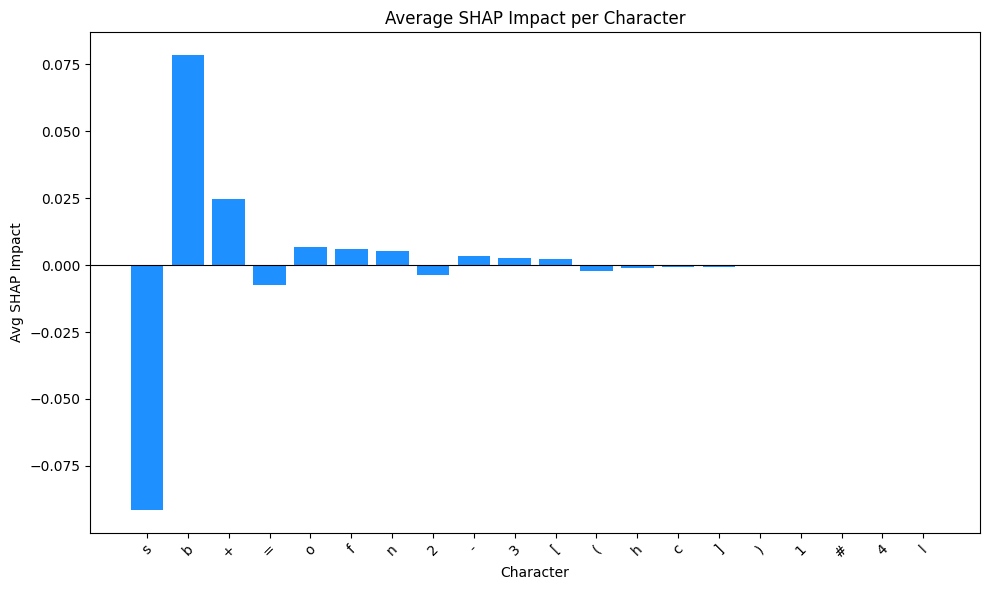

In [ ]:
import matplotlib.pyplot as plt

# Unzip the sorted_shap tuple list into two lists: one for characters and one for their corresponding average SHAP impacts
chars, avg_impact = zip(*sorted_shap)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(chars, avg_impact, color='dodgerblue')
plt.xlabel('Character')
plt.ylabel('Avg SHAP Impact')
plt.title('Average SHAP Impact per Character')
plt.axhline(0, color='black', linewidth=0.8)  # adds a horizontal line at y=0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()